In [4]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.datasets import make_blobs
import numpy as np
%matplotlib inline
import scipy

import time
import networkx as nx
import collections
from collections import defaultdict
import random
import pandas as pd
import statistics
import pickle
from models_updated import *
import networkx as nx

import random

sns.set(style='white', context='poster', rc={'figure.figsize':(8,6)})
#default_seed = 16


In [5]:
def ipfnA(data, n_neighbors):
    #s= no of points
    #c_arr = Array of centers
    #sd = std. dev.
    #n = n_neighbors 
#     print([s,c_arr, sd, n_neighbors])

    
    r = np.random.RandomState(10)
    coo_matrix1 = umap.fuzzy_simplicial_set(data,n_neighbors,r,'euclidean')
    coo_matrix1 = np.asarray(coo_matrix1)
    sparse_matrix = coo_matrix1[0]
    #print(sparse_matrix.getnnz()

    return nx.from_scipy_sparse_matrix(sparse_matrix)
    

In [6]:
import pickle
with open('Cluster Experiments/cluster1.pkl', 'rb') as infile:
    data1 = pickle.load(infile)
    
with open('Cluster Experiments/cluster2.pkl', 'rb') as infile:
    data2 = pickle.load(infile)



In [7]:
def ipfnB(G1,s,exp,inf):
#s = no of points
    SIGMA  = 1/5.2
    GAMMA  = 1/10
    MU_I   = 0.002

    R0     = 2.5
    BETA   = 1/(1/GAMMA) * R0
    BETA_Q = 0.5*BETA

    P      = 0.2
    Q      = 0.05

    
    model_base = SEIRSNetworkModel(G       = G1, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = s*exp, initI = s*inf)
    
    model_base.run(T=300)
    fig,axs = model_base.figure_basic(ylim=0.75,xlim=100)
    
    line = axs.lines[1]
    p = line.get_data()
    p0 = p[0].compressed()
    p1 = p[1].compressed()
    #Maximum
    m = max(p[1])
    #Days Max
    ind= numpy.argmax(p[1])
    d = p[0][numpy.argmax(p[1])]
    #Mean and St Deviation
    mean  = statistics.mean(p1)
    stdev =  statistics.stdev(p1)
    line1 = axs.lines[2]
    w = line1.get_data()
    #Total Infections
    tot = 1 -(w[1][w[1].shape[0]-1])
    tp = 0.1*m
    np = 0.9*m
    #Ten Percent
    tpl =[]
    for i in range(len(p1)):
        x = numpy.abs(p1[i]-tp)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            tpl.append(p0[i])
    tplval = statistics.mean(tpl)
    
    #Ninety Percent
    nplfh =[]
    nplsh = []
    for i in range(ind):
        x = numpy.abs(p1[i]-np)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            nplfh.append(p0[i])
    for i in range(ind, len(p1)):
        x = numpy.abs(p1[i]-np)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            nplsh.append(p0[i])
    npl=[(statistics.mean(nplfh)),(statistics.mean(nplsh))]
    
    P = model_base.X
    cluster2 = P[1000:]
    count =0
    for i in cluster2:
        if(i==4):
            count = count+1
    
    lday = p0[(len(p0)-1)]
    
    
    return m,d,tot,tplval,npl, mean, stdev,count,lday

In [10]:
graph1 = ipfnA(data1,20)

/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [11]:
graph2 = ipfnA(data2,20)

In [13]:
graph_base = nx.disjoint_union(graph1,graph2)

In [8]:
with open('Cluster Experiments/graph_list_long.pkl', 'rb') as infile:
    graph_list = pickle.load(infile)

In [6]:
with open('Cluster Experiments/graph_list_0to1k.pkl', 'rb') as infile:
    graph_list_s = pickle.load(infile)

In [9]:
Y=[]
X=[]
T=[]
TP=[]
NPL=[]
AVG=[]
STDV=[]
COUNT =[]
LDAY =[]

t = 0.00
t = 10.02
t = 20.02
t = 30.04
t = 40.15
t = 50.21
t = 60.09
t = 80.35


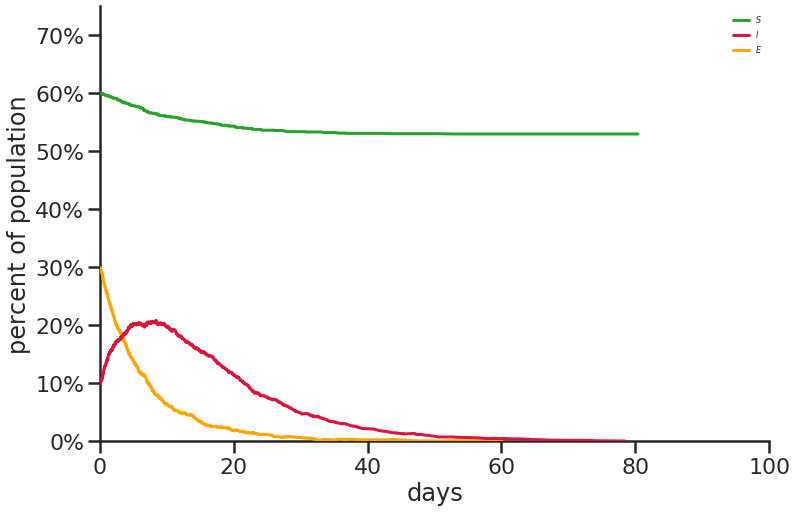

t = 0.00
t = 10.00
t = 20.02
t = 30.06
t = 40.01
t = 50.07


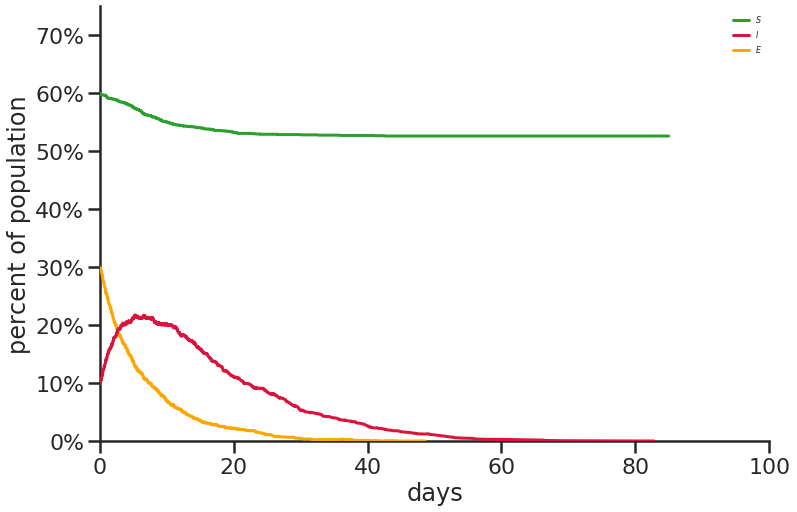

t = 0.00
t = 10.01
t = 20.02
t = 30.04
t = 40.41
t = 50.91
t = 70.52


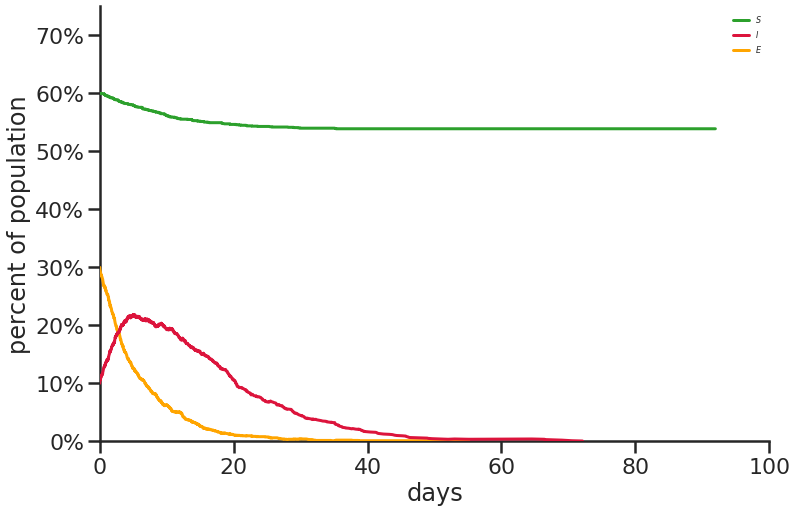

t = 0.00
t = 10.06
t = 20.02
t = 30.02
t = 40.71
t = 50.42


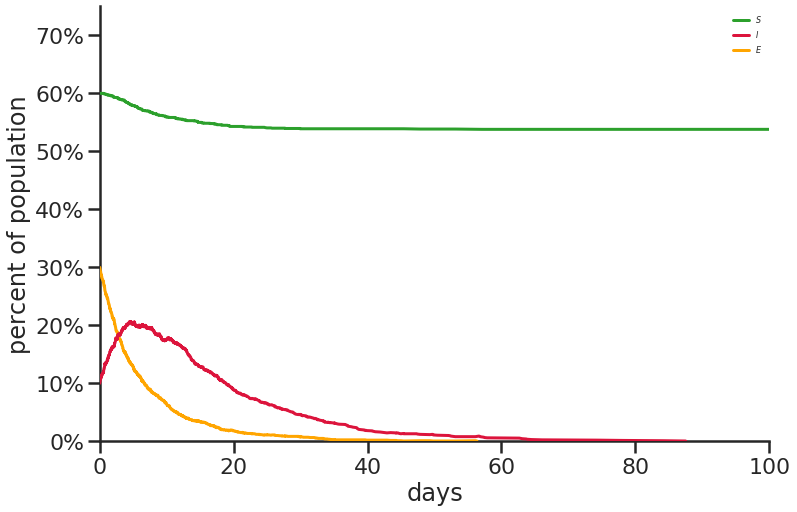

t = 0.02
t = 10.02
t = 20.00
t = 30.01
t = 40.01
t = 50.73


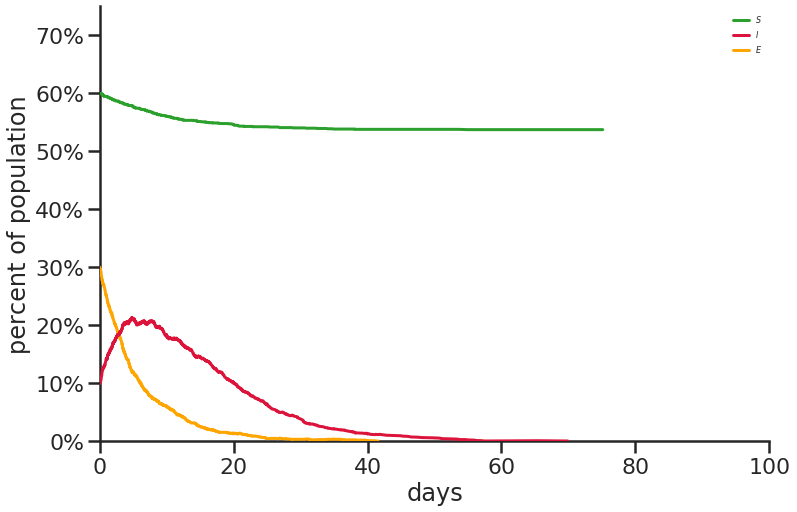

t = 0.00
t = 10.00
t = 20.01
t = 30.23
t = 40.07
t = 50.15
t = 60.70


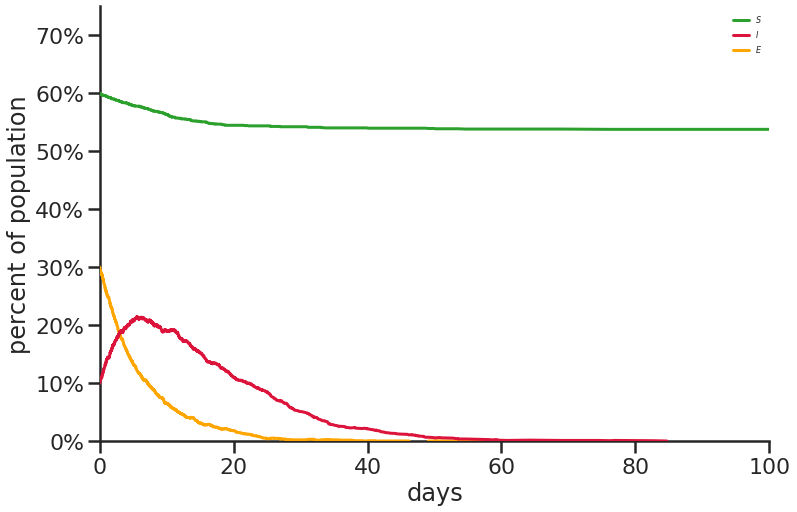

t = 0.02
t = 10.01
t = 20.09
t = 30.02
t = 40.16
t = 50.12


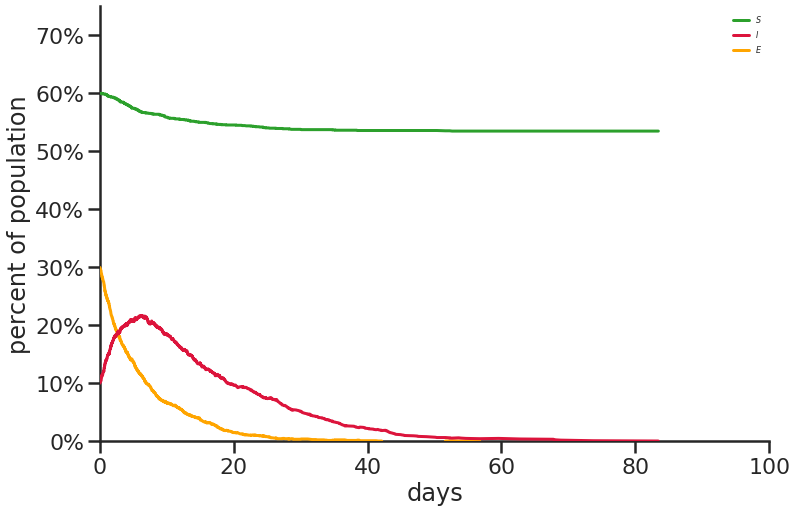

t = 0.00
t = 10.05
t = 20.02
t = 30.07
t = 40.08
t = 50.21
t = 60.04


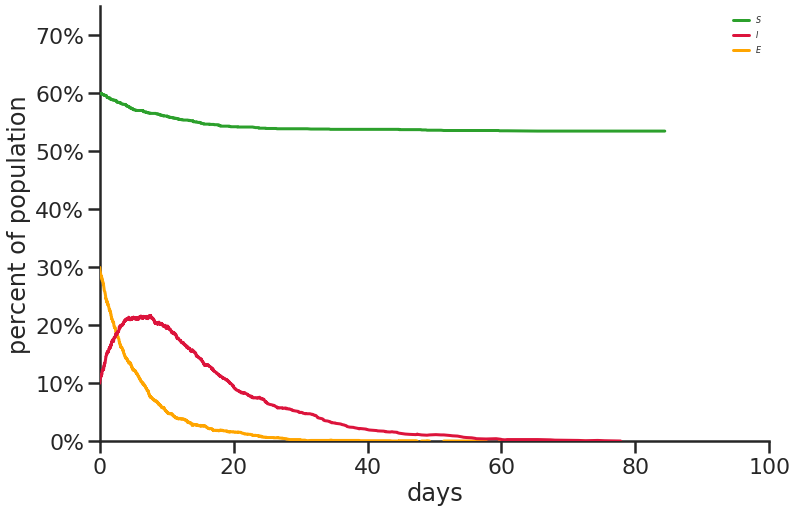

t = 0.00
t = 10.01
t = 20.01
t = 30.07
t = 40.02
t = 60.32
t = 70.53
t = 80.84


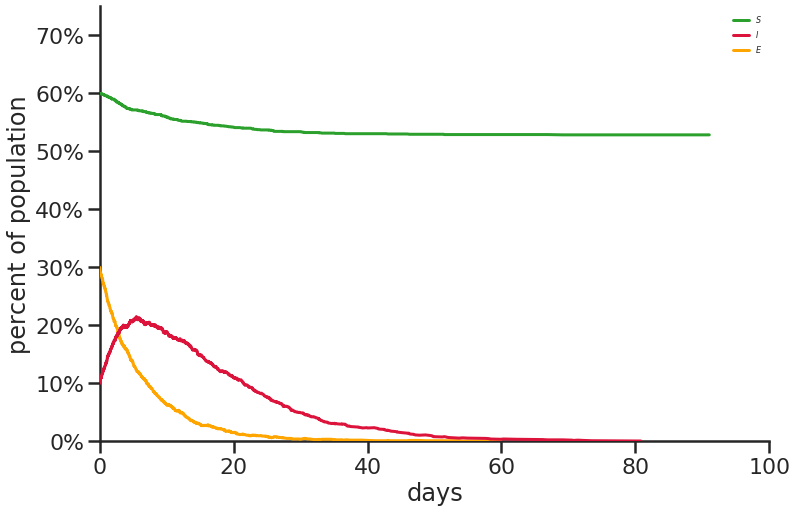

t = 0.00
t = 10.01
t = 20.03
t = 30.04
t = 40.39
t = 60.49


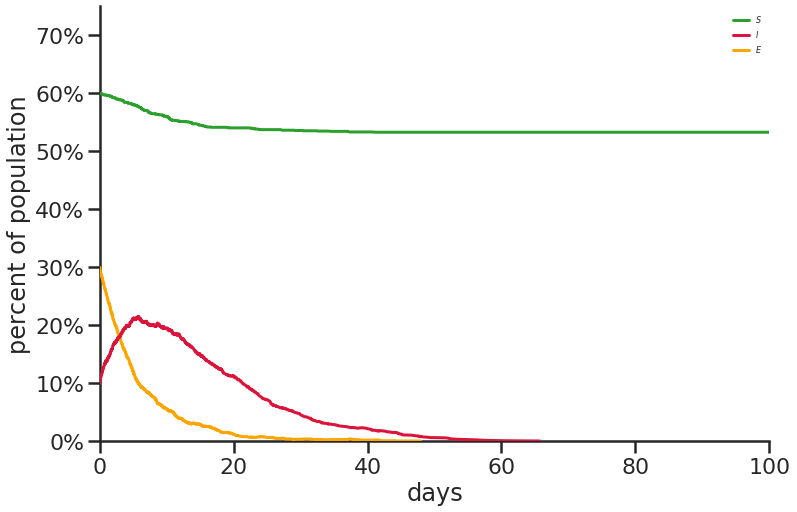

t = 0.01
t = 10.01
t = 20.02
t = 30.01
t = 40.10
t = 50.25
t = 60.01
t = 70.53
t = 80.30
t = 90.44
t = 110.51


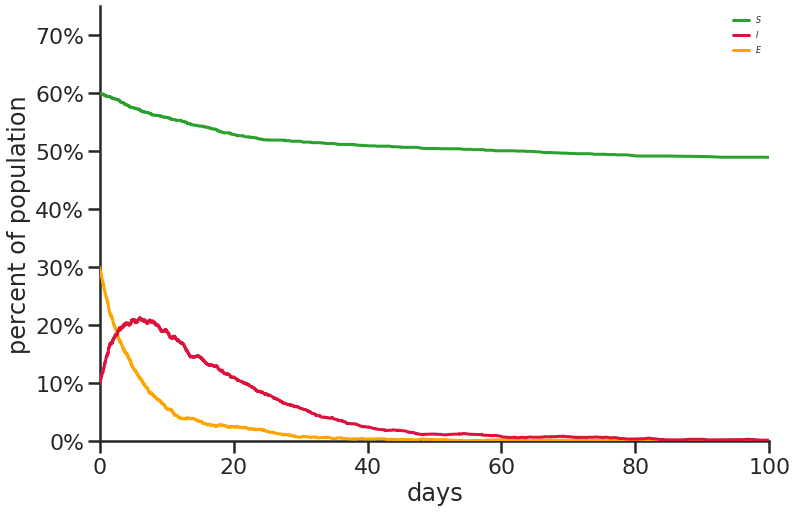

t = 0.03
t = 10.00
t = 20.01
t = 30.05
t = 40.04
t = 50.07
t = 60.15
t = 70.15
t = 80.00
t = 90.36
t = 100.14
t = 120.32
t = 130.18
t = 140.51
t = 160.54


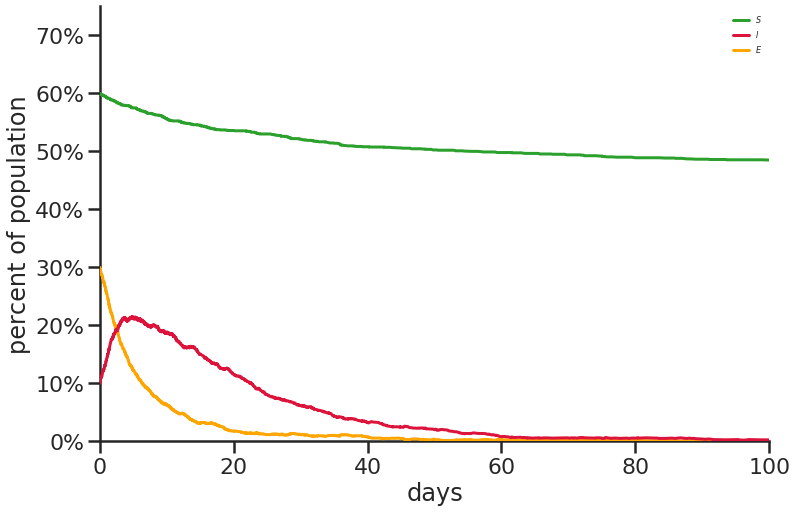

t = 0.02
t = 10.00
t = 20.01
t = 30.05
t = 40.01
t = 50.07
t = 60.01
t = 70.17
t = 80.04
t = 90.89


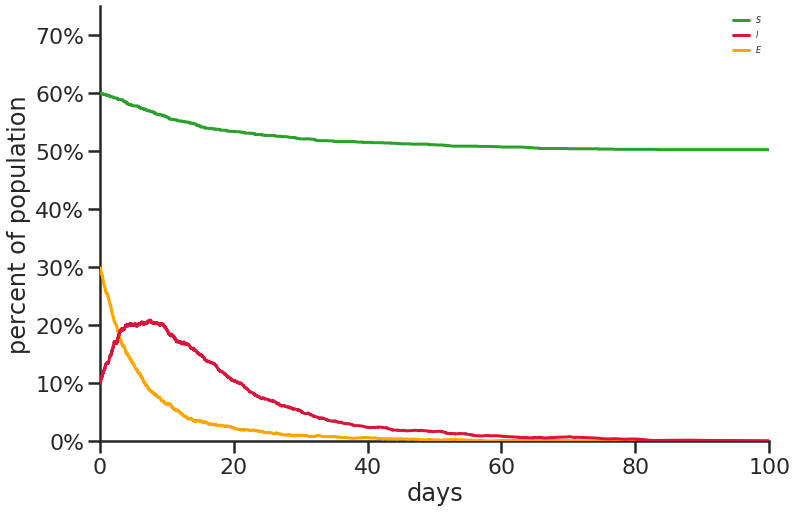

t = 0.01
t = 10.03
t = 20.05
t = 30.03
t = 40.15
t = 50.05
t = 60.35
t = 80.71
t = 90.06
t = 110.33


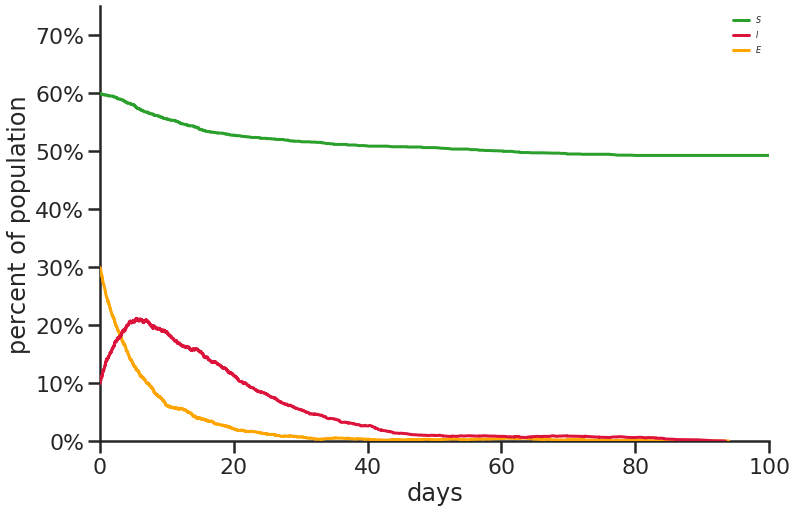

t = 0.01
t = 10.00
t = 20.01
t = 30.09
t = 40.02
t = 50.09
t = 70.10
t = 80.31
t = 90.28
t = 100.48


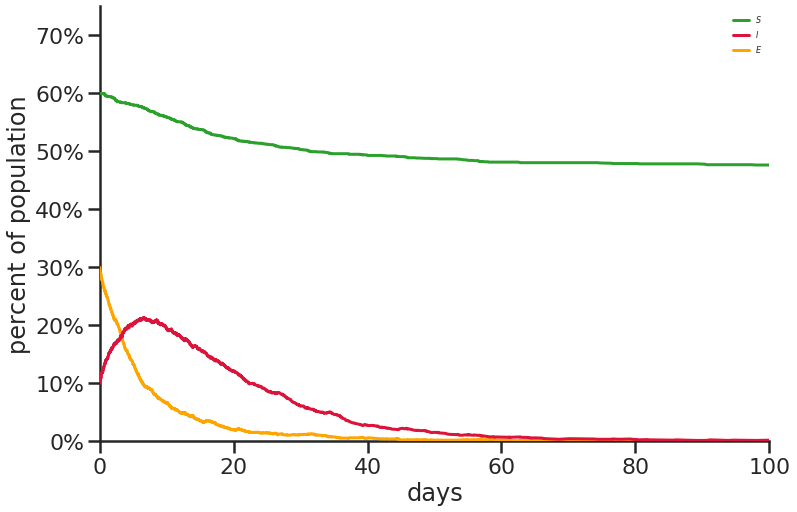

t = 0.00
t = 10.04
t = 20.00
t = 30.03
t = 40.01
t = 50.41
t = 60.07
t = 70.19
t = 80.28
t = 90.10
t = 110.63


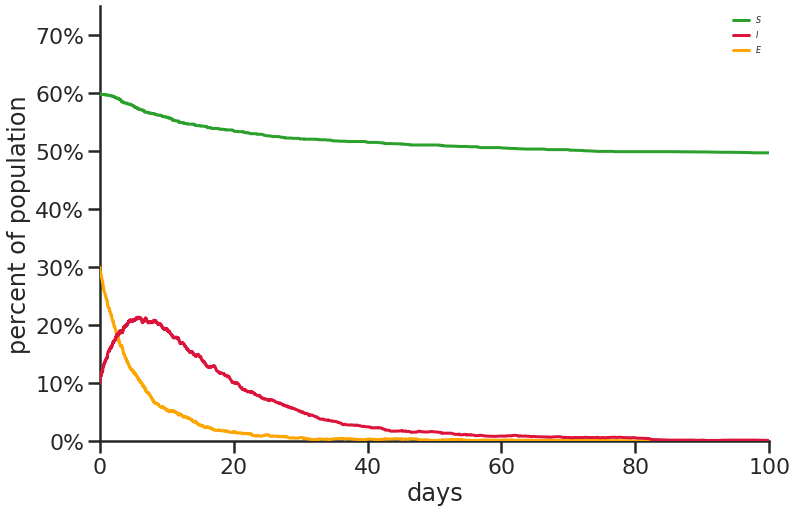

t = 0.01
t = 10.01
t = 20.01
t = 30.09
t = 40.22
t = 50.02
t = 60.22
t = 70.02
t = 80.53
t = 90.17
t = 100.21
t = 120.67
t = 140.62


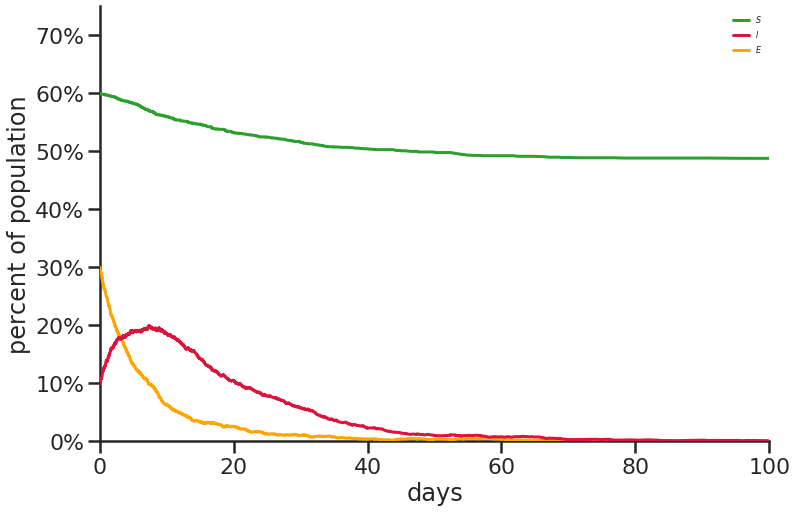

t = 0.00
t = 10.01
t = 20.00
t = 30.12
t = 40.02
t = 50.01
t = 60.27
t = 70.54
t = 80.22
t = 90.28


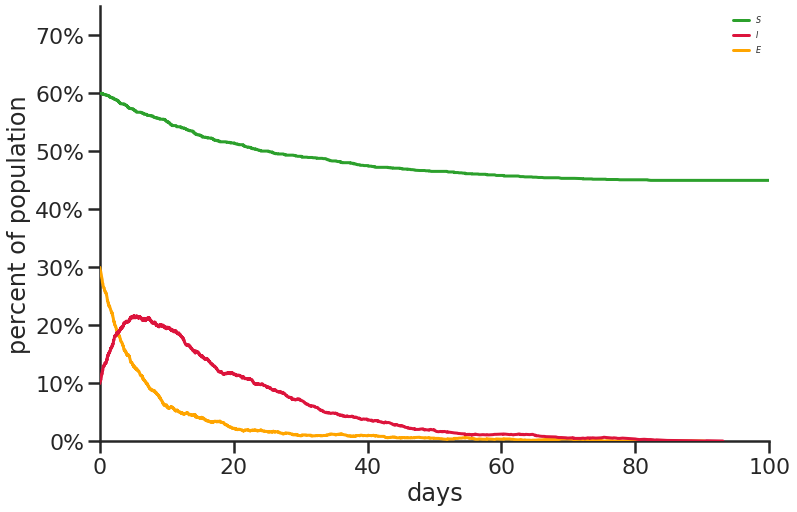

t = 0.00
t = 10.00
t = 20.02
t = 30.01
t = 40.10
t = 50.12
t = 60.58
t = 70.06
t = 100.00
t = 110.80
t = 120.54
t = 130.39
t = 140.05
t = 150.20


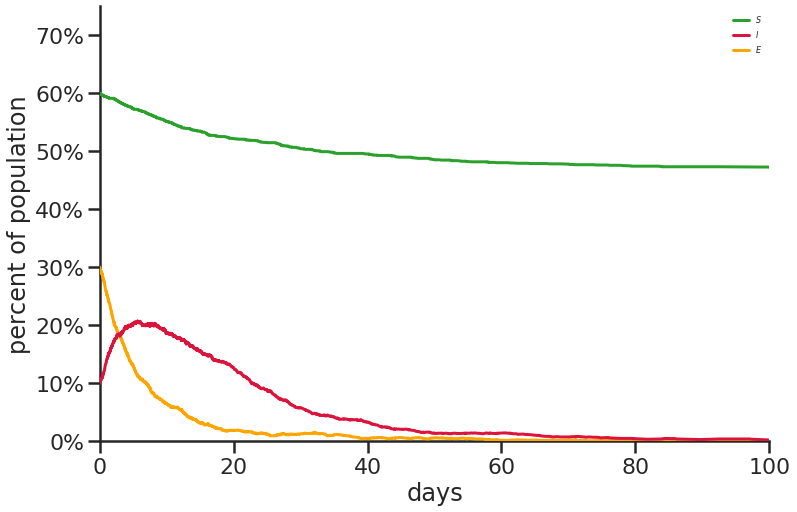

t = 0.00
t = 10.02
t = 20.03
t = 30.04
t = 40.11
t = 50.17
t = 60.39
t = 70.58
t = 80.57
t = 90.24
t = 100.55
t = 120.38
t = 170.67
t = 210.68
t = 230.21
t = 260.16


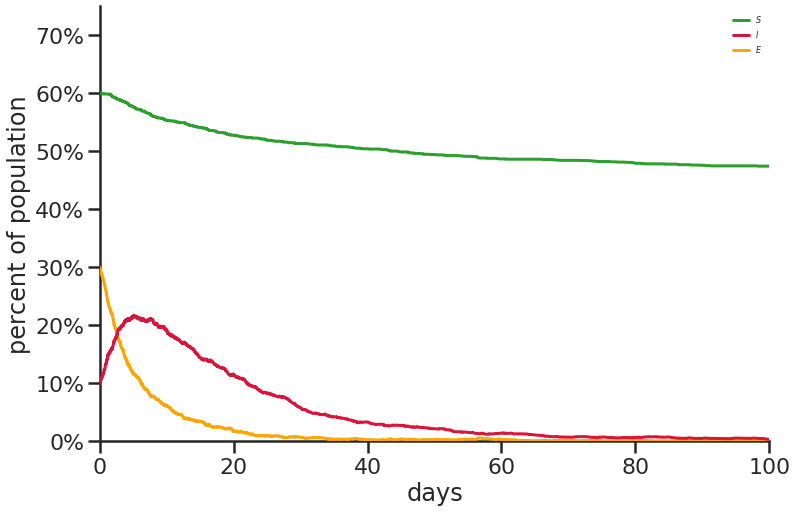

t = 0.00
t = 10.00
t = 20.06
t = 30.06
t = 40.02
t = 50.12
t = 60.01
t = 70.59
t = 80.52
t = 90.55


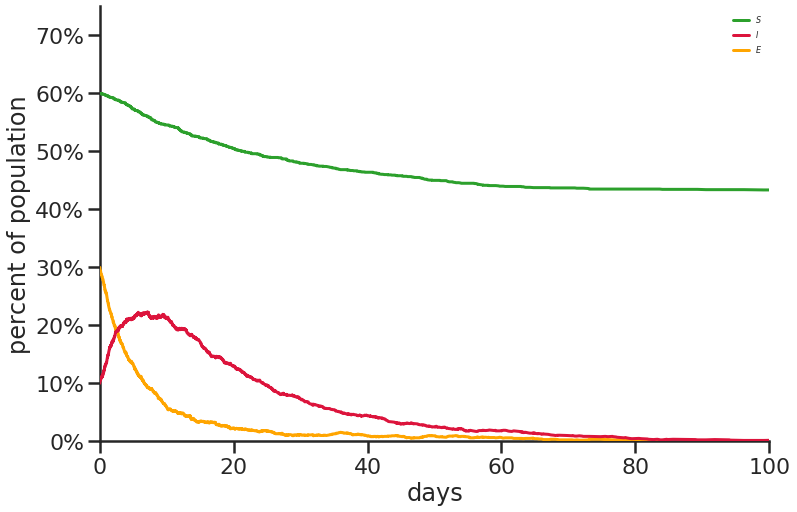

t = 0.02
t = 10.00
t = 20.01
t = 30.07
t = 40.12
t = 50.10
t = 60.11
t = 70.29
t = 80.54
t = 90.33
t = 100.29
t = 110.45
t = 120.30
t = 150.57
t = 160.78
t = 170.06


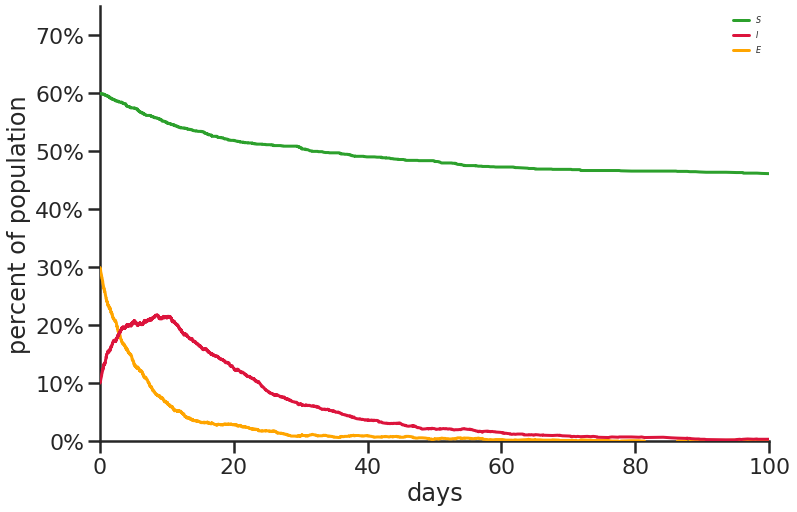

t = 0.00
t = 10.01
t = 20.00
t = 30.10
t = 40.01
t = 50.02
t = 70.61
t = 80.03
t = 90.05
t = 100.72
t = 110.28
t = 140.68
t = 160.76


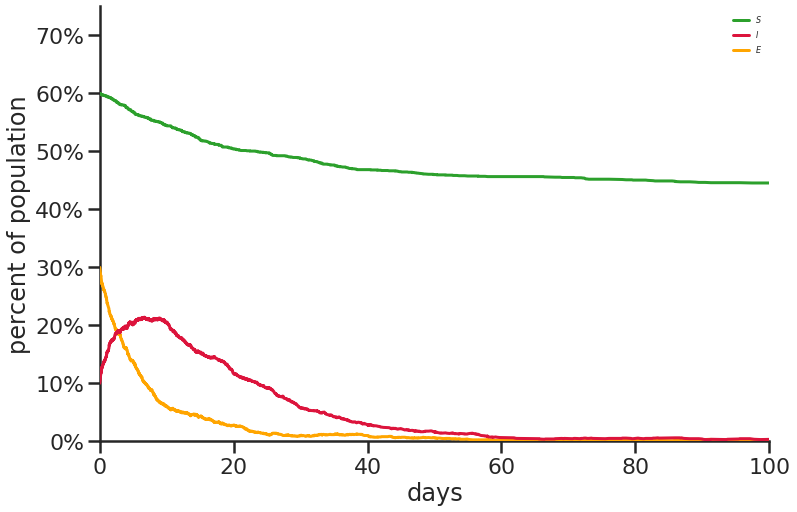

t = 0.00
t = 10.01
t = 20.01
t = 30.10
t = 40.11
t = 50.03
t = 60.23
t = 70.32
t = 80.20
t = 110.15
t = 140.53
t = 160.48
t = 180.73


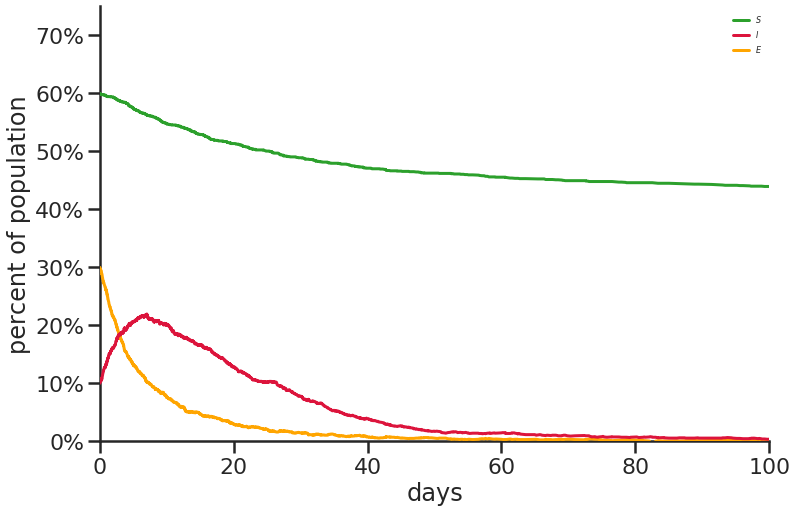

t = 0.01
t = 10.01
t = 20.02
t = 30.07
t = 40.06
t = 50.06
t = 60.41
t = 70.07
t = 90.09
t = 100.31
t = 110.04
t = 120.10


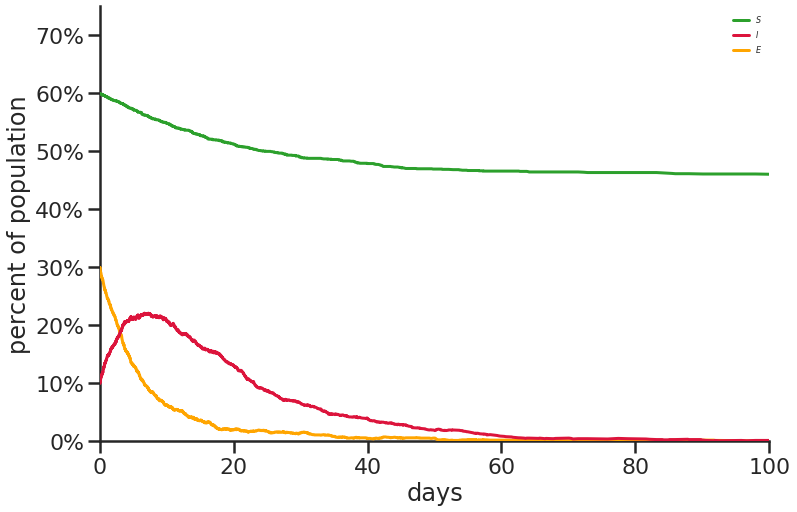

t = 0.00
t = 10.01
t = 20.04
t = 30.00
t = 40.00
t = 50.06
t = 60.74
t = 70.33
t = 80.92
t = 100.39
t = 110.44
t = 120.53


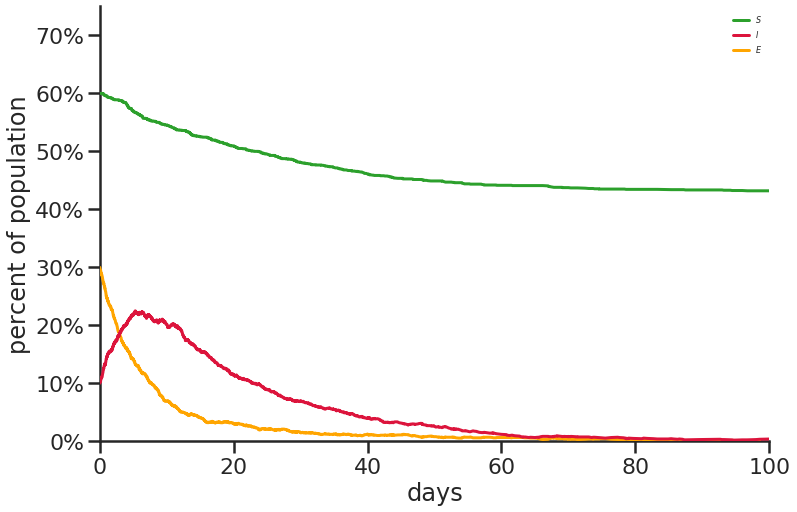

t = 0.00
t = 10.01
t = 20.01
t = 30.04
t = 40.05
t = 50.03
t = 60.27
t = 70.51
t = 80.29
t = 90.01
t = 100.41


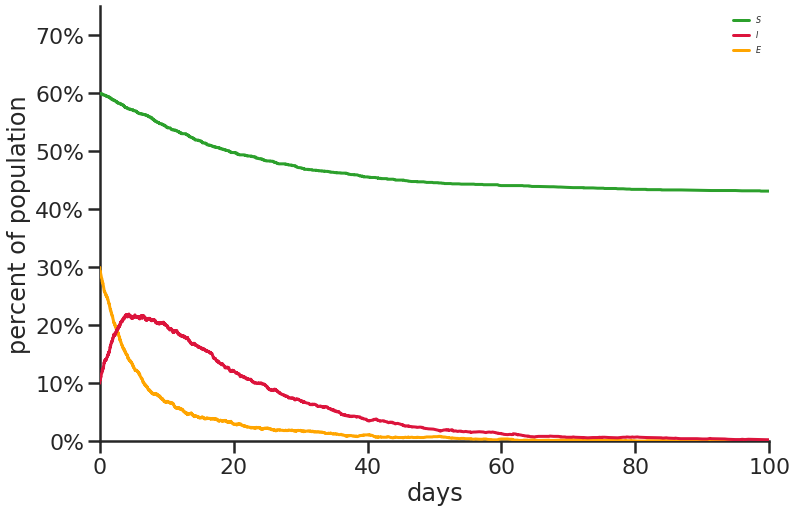

t = 0.00
t = 10.00
t = 20.00
t = 30.05
t = 40.12
t = 50.03
t = 60.01
t = 70.55
t = 80.43
t = 120.19


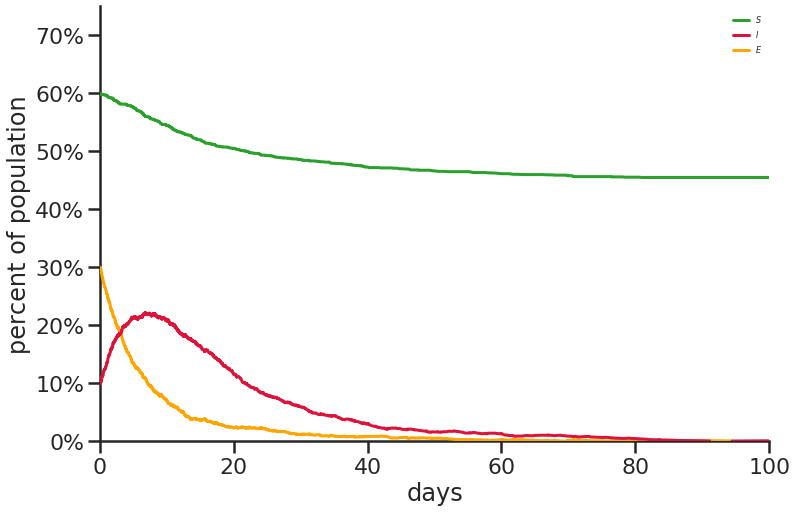

t = 0.00
t = 10.00
t = 20.01
t = 30.04
t = 40.01
t = 50.07
t = 60.24
t = 70.13
t = 80.53
t = 90.07
t = 120.13


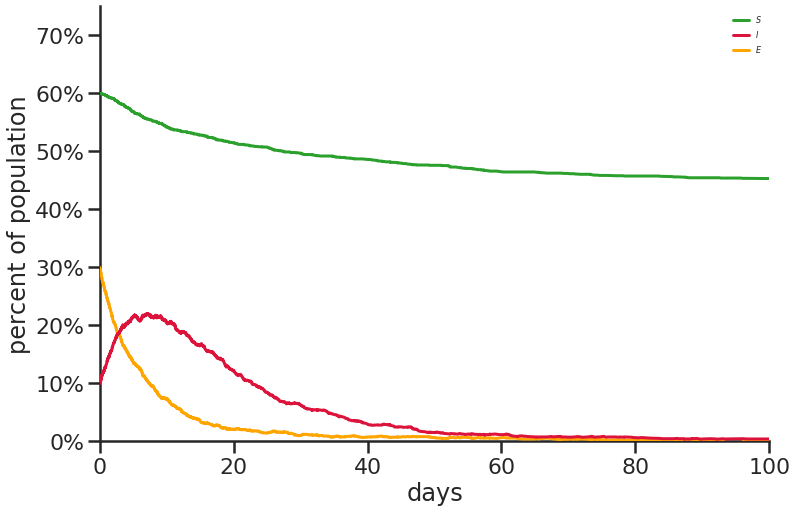

t = 0.00
t = 10.00
t = 20.11
t = 30.04
t = 40.41
t = 50.05
t = 60.25
t = 70.06
t = 80.02
t = 90.04
t = 100.28
t = 110.42
t = 130.62


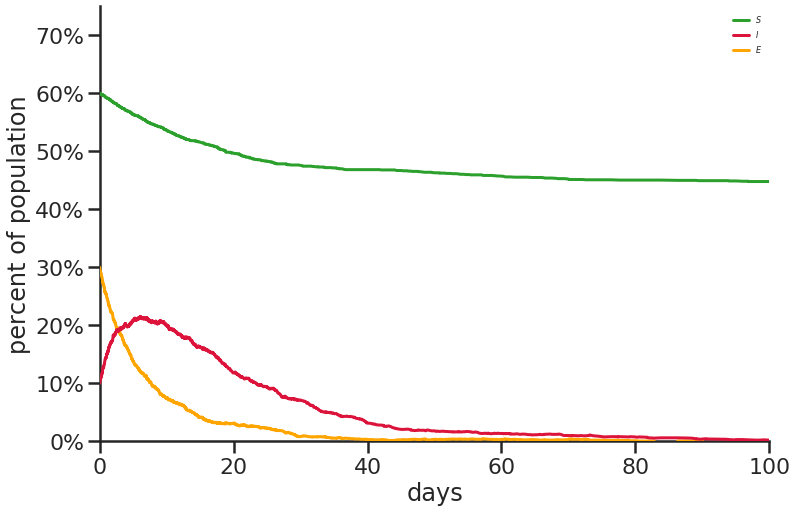

t = 0.00
t = 10.02
t = 20.02
t = 30.00
t = 40.06
t = 50.07
t = 60.02
t = 70.92
t = 80.15
t = 90.28
t = 100.84


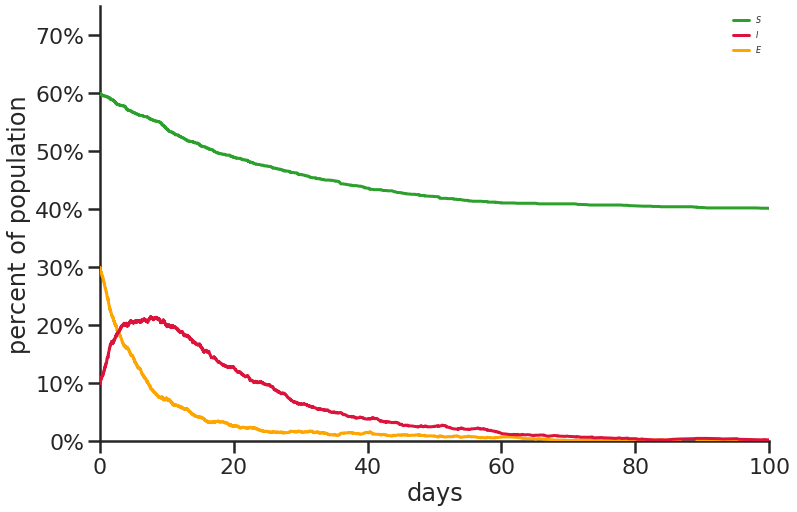

t = 0.01
t = 10.01
t = 20.06
t = 30.02
t = 40.00
t = 50.01
t = 60.17
t = 70.26
t = 80.59
t = 100.25
t = 110.07
t = 120.16


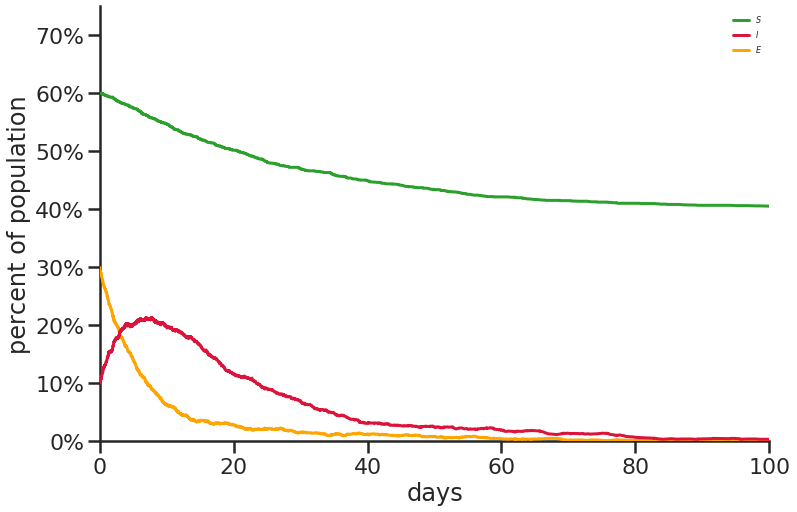

t = 0.03
t = 10.04
t = 20.01
t = 30.10
t = 40.07
t = 50.07
t = 60.68
t = 70.20
t = 80.21


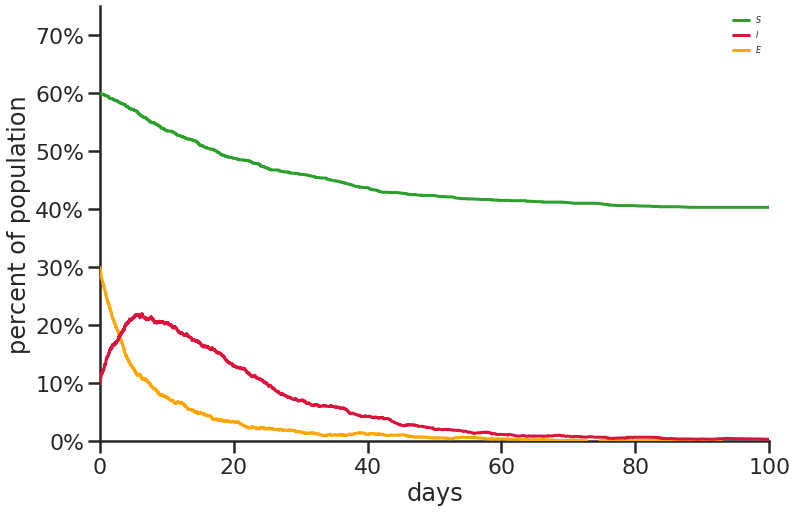

t = 0.00
t = 10.02
t = 20.08
t = 30.02
t = 40.29
t = 50.03
t = 60.02
t = 70.09
t = 80.49
t = 90.22
t = 100.20
t = 110.64
t = 150.57


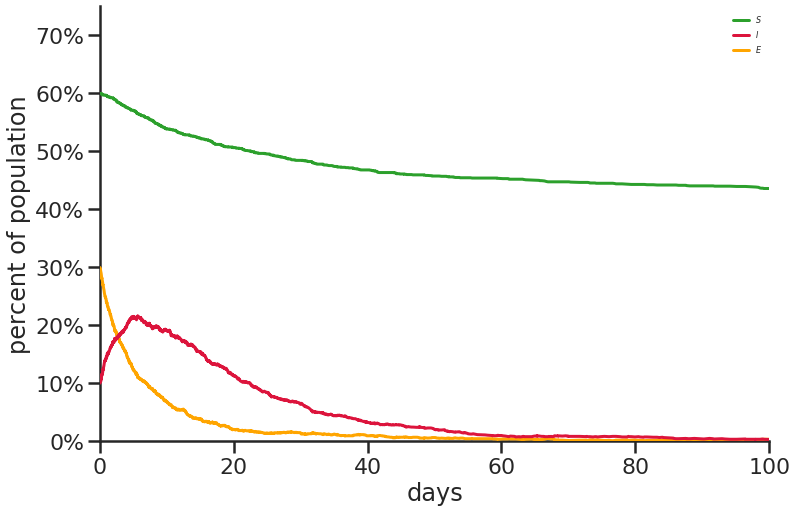

t = 0.02
t = 10.02
t = 20.05
t = 30.09
t = 40.04
t = 50.19
t = 60.09
t = 70.54
t = 80.21
t = 100.43
t = 110.82


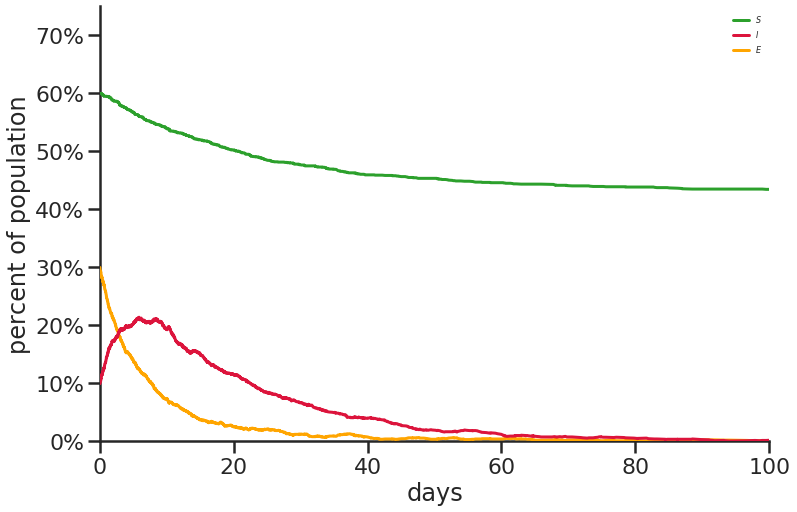

t = 0.01
t = 10.01
t = 20.04
t = 30.05
t = 40.15
t = 50.27
t = 60.06
t = 70.45
t = 80.25
t = 90.02
t = 100.35
t = 110.39
t = 120.63
t = 150.02
t = 180.93


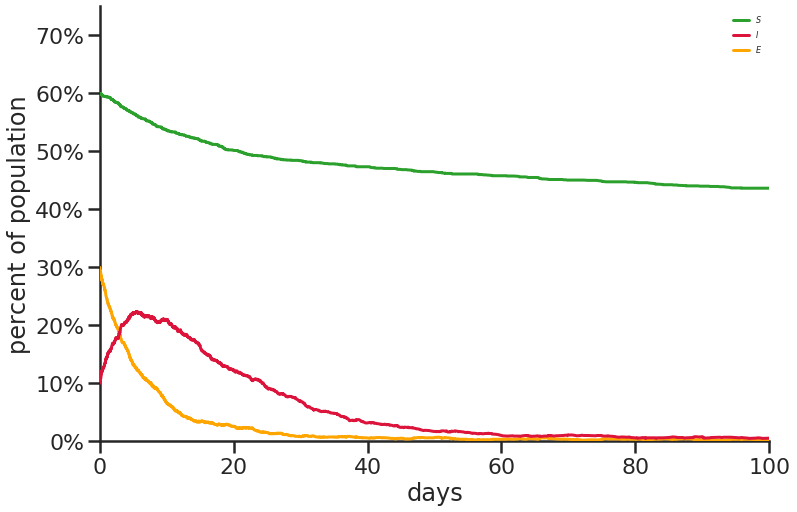

t = 0.00
t = 10.00
t = 20.03
t = 30.03
t = 40.16
t = 50.03
t = 60.05
t = 70.15
t = 80.69
t = 100.47


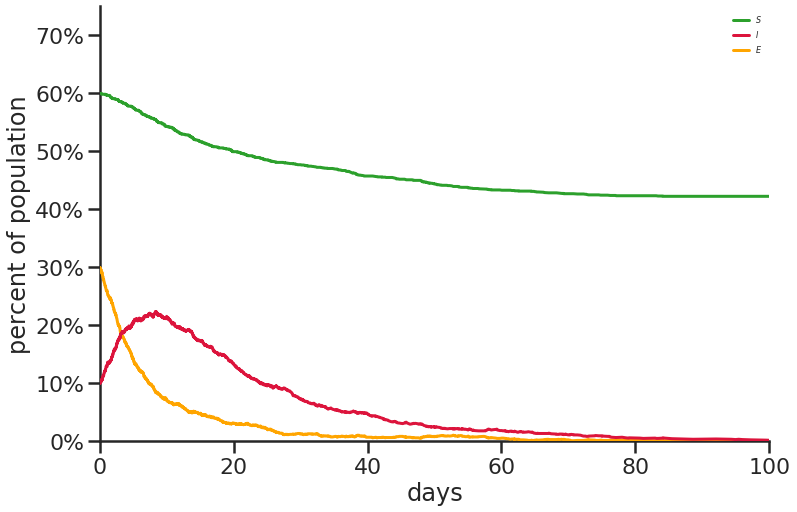

t = 0.02
t = 10.00
t = 20.01
t = 30.13
t = 40.06
t = 50.04
t = 60.00
t = 70.03
t = 80.23
t = 90.38
t = 100.58
t = 110.66


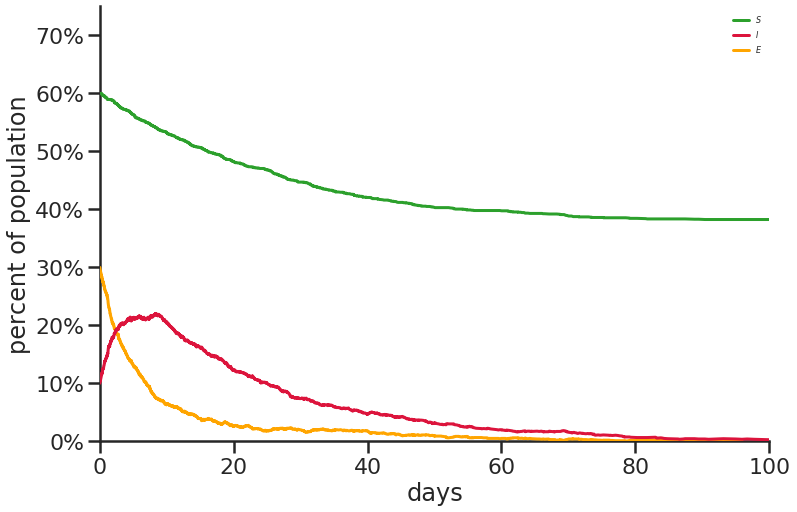

t = 0.00
t = 10.04
t = 20.01
t = 30.01
t = 40.02
t = 50.08
t = 60.08
t = 70.21
t = 80.06
t = 90.33
t = 100.00
t = 110.28
t = 130.15


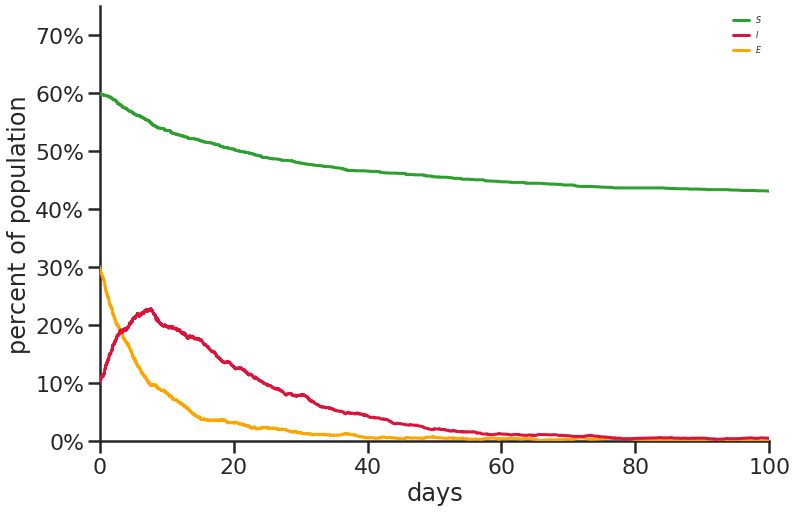

t = 0.00
t = 10.01
t = 20.04
t = 30.01
t = 40.05
t = 50.08
t = 60.12
t = 70.08
t = 80.04
t = 90.61
t = 100.49
t = 120.58
t = 130.90
t = 170.86


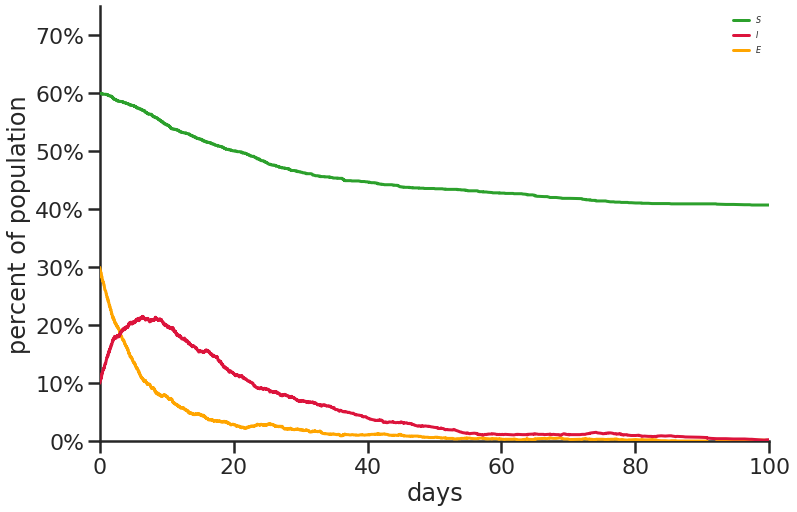

t = 0.01
t = 10.00
t = 20.06
t = 30.01
t = 40.09
t = 50.01
t = 60.10
t = 70.35
t = 80.04
t = 90.16
t = 100.19


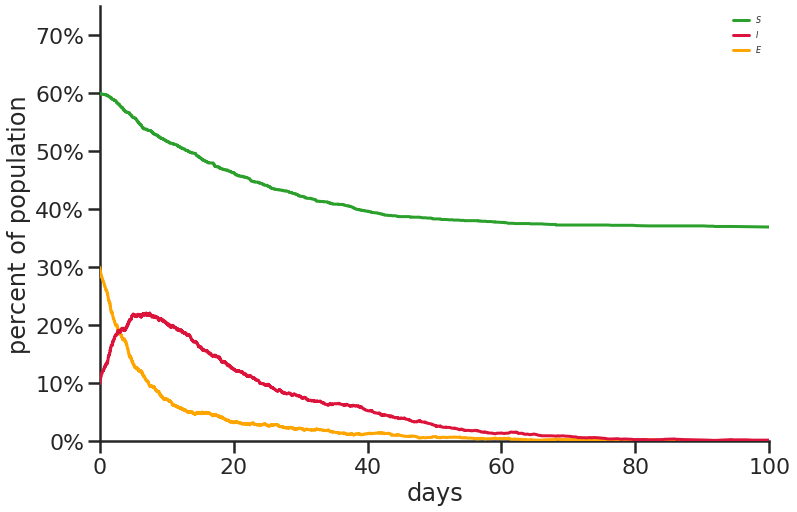

t = 0.00
t = 10.00
t = 20.01
t = 30.03
t = 40.02
t = 50.04
t = 60.36
t = 70.21
t = 80.25
t = 90.33
t = 100.69


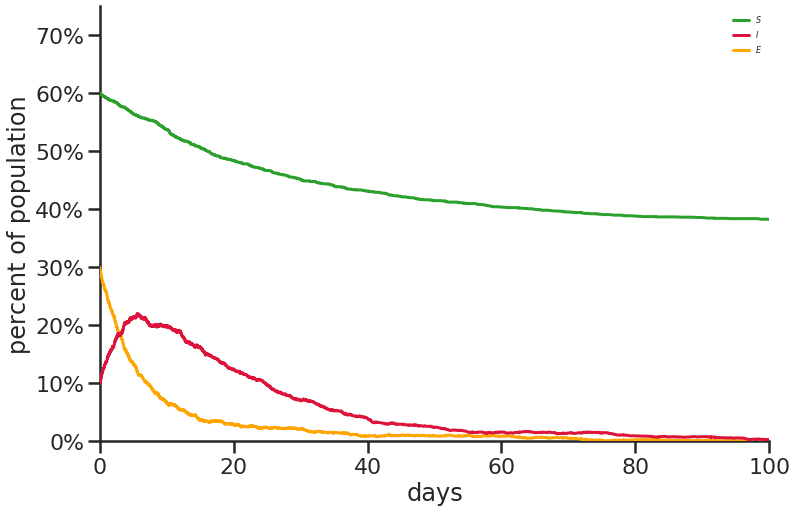

t = 0.00
t = 10.01
t = 20.00
t = 30.05
t = 40.09
t = 50.38
t = 60.00
t = 70.27
t = 90.26
t = 100.20
t = 110.19


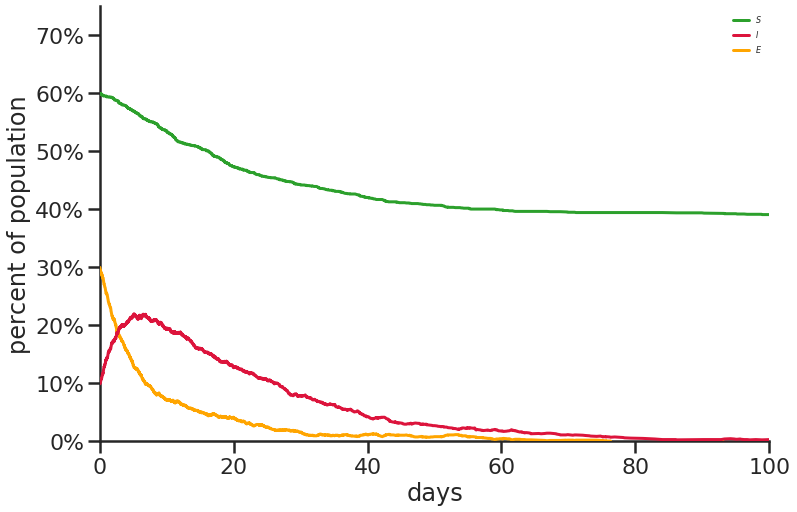

t = 0.03
t = 10.02
t = 20.01
t = 30.02
t = 40.05
t = 50.00
t = 60.01
t = 70.23
t = 80.13
t = 90.70
t = 100.15
t = 120.15


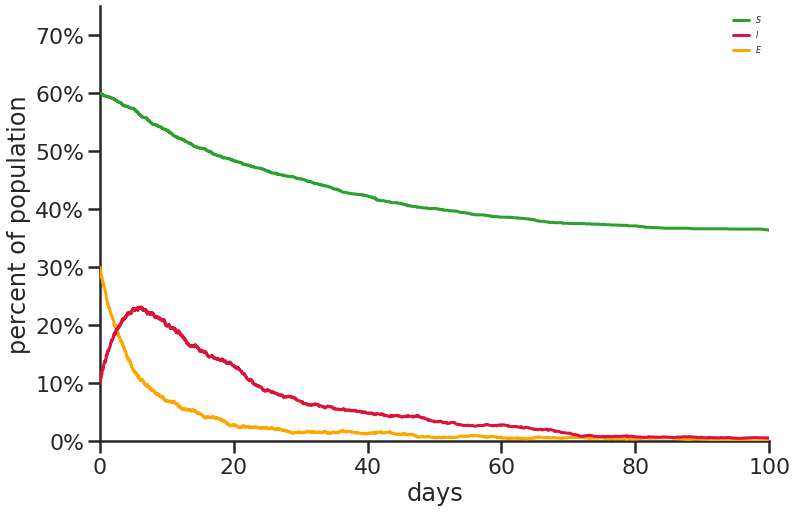

t = 0.00
t = 10.02
t = 20.01
t = 30.01
t = 40.07
t = 50.01
t = 60.09
t = 70.06
t = 80.31
t = 90.69
t = 110.36


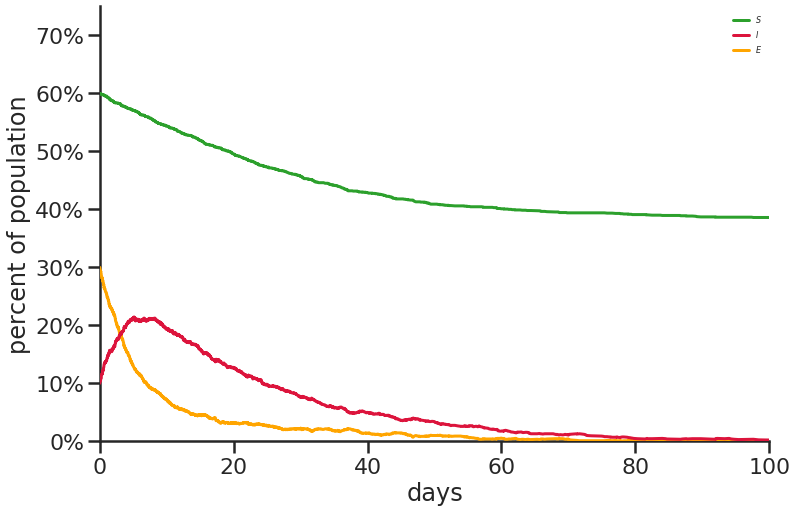

t = 0.00
t = 10.00
t = 20.01
t = 30.00
t = 40.05
t = 50.00
t = 60.05
t = 70.02
t = 80.06
t = 90.01
t = 110.32
t = 120.49
t = 140.24
t = 150.00
t = 170.06


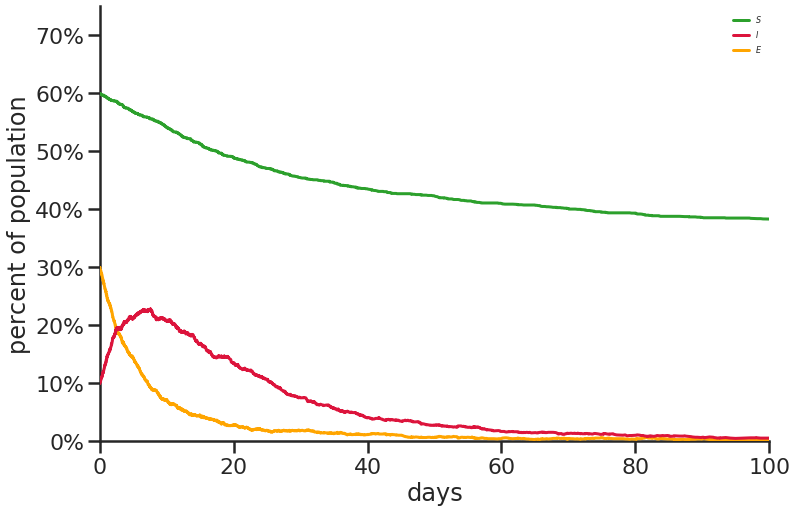

t = 0.00
t = 10.02
t = 20.02
t = 30.03
t = 40.03
t = 50.10
t = 60.18
t = 70.04
t = 80.07
t = 90.11
t = 100.50
t = 110.07
t = 140.21


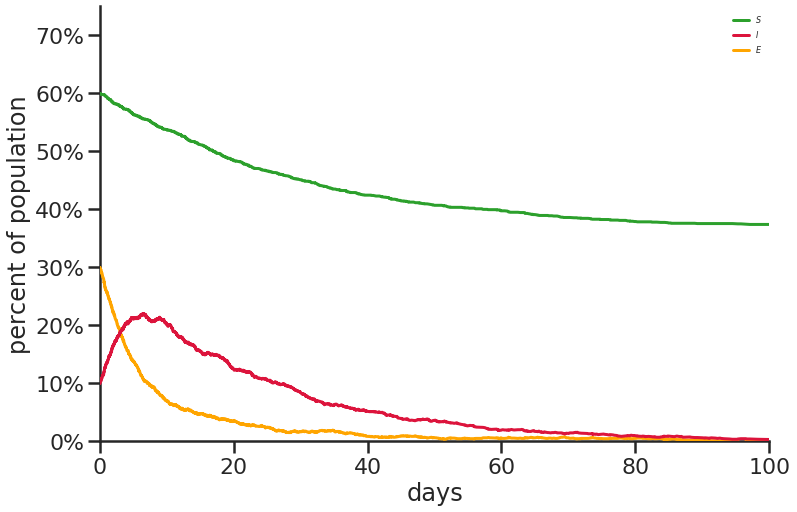

t = 0.00
t = 10.00
t = 20.05
t = 30.00
t = 40.03
t = 50.14
t = 60.18
t = 70.21
t = 80.27
t = 90.13
t = 140.89


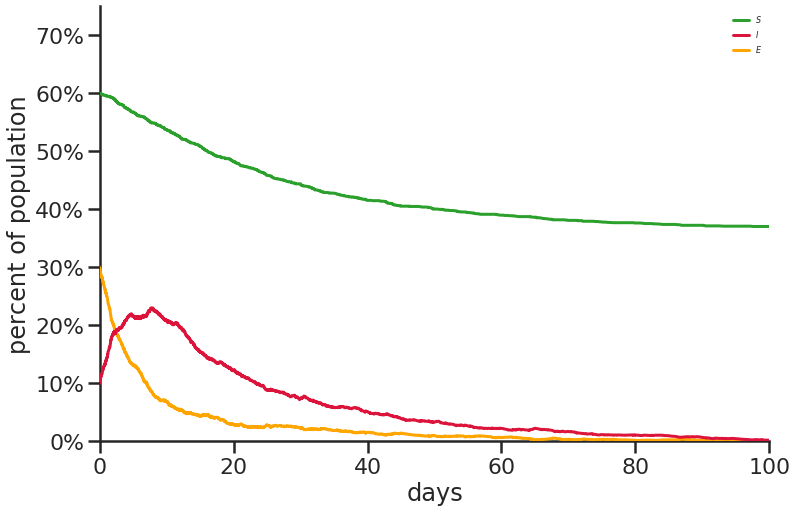

t = 0.01
t = 10.02
t = 20.01
t = 30.04
t = 40.02
t = 50.08
t = 60.03
t = 70.02
t = 80.57
t = 90.75
t = 100.62
t = 110.16
t = 120.40
t = 130.43
t = 140.61
t = 160.42


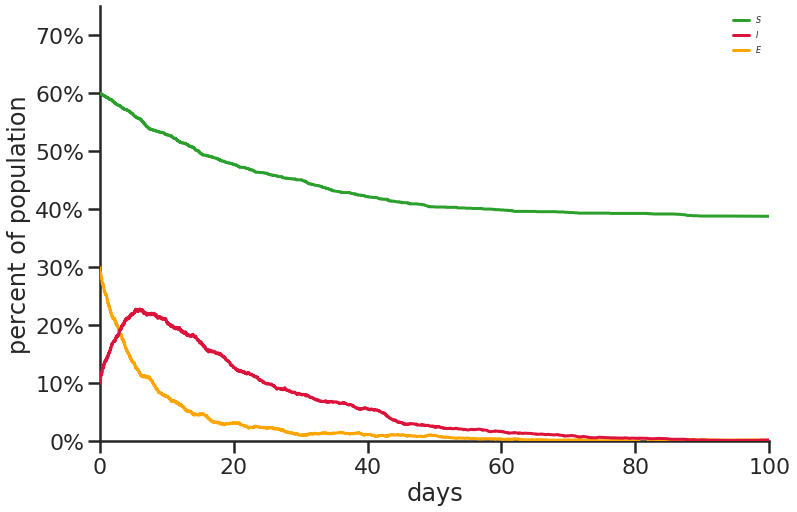

t = 0.00
t = 10.01
t = 20.04
t = 30.07
t = 40.02
t = 50.10
t = 60.41
t = 70.56
t = 80.12
t = 90.11
t = 100.01
t = 110.38


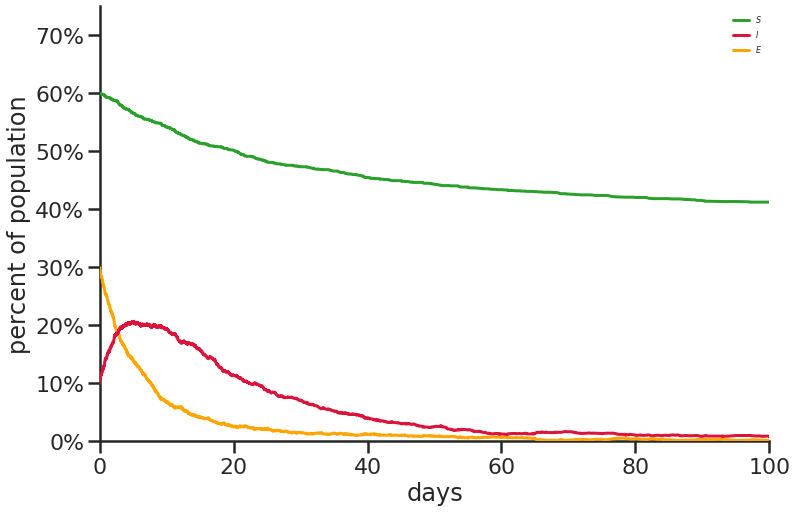

t = 0.01
t = 10.01
t = 20.03
t = 30.05
t = 40.13
t = 50.56
t = 60.20
t = 80.14
t = 90.46
t = 100.81
t = 130.11


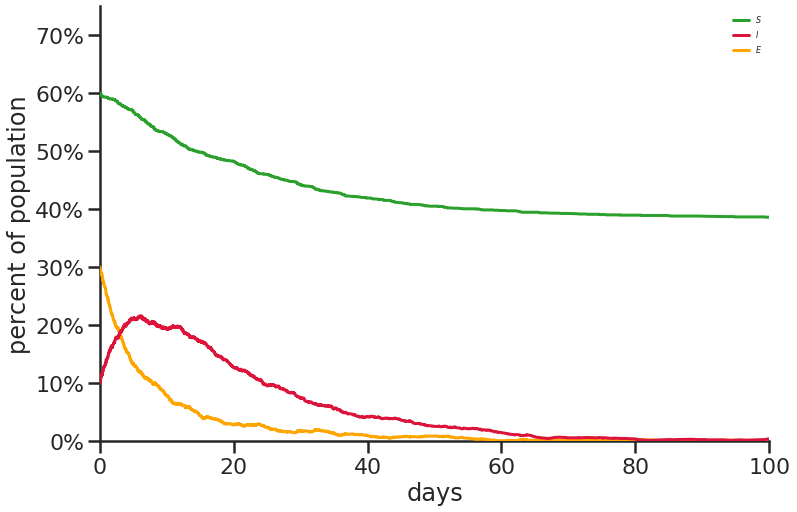

t = 0.01
t = 10.04
t = 20.00
t = 30.03
t = 40.21
t = 50.07
t = 60.15
t = 70.92
t = 80.25
t = 90.10
t = 100.31
t = 110.36
t = 120.32


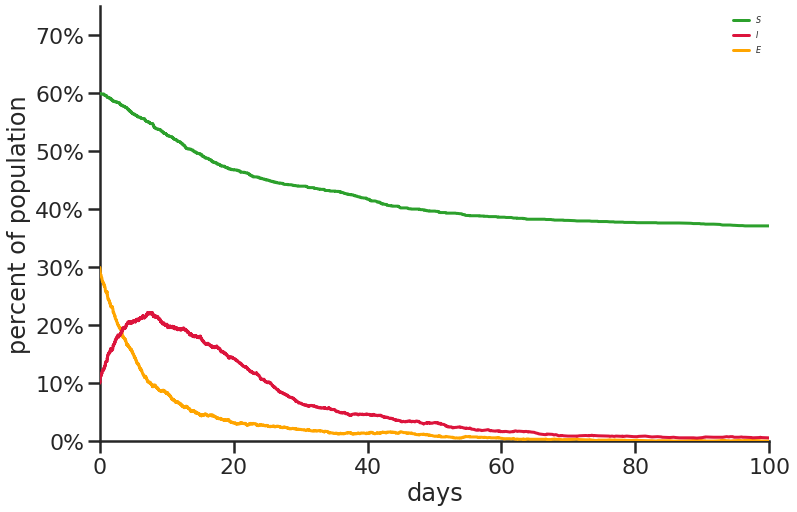

t = 0.01
t = 10.02
t = 20.01
t = 30.11
t = 40.08
t = 50.02
t = 60.01
t = 70.24
t = 80.01
t = 90.15
t = 100.69
t = 110.01


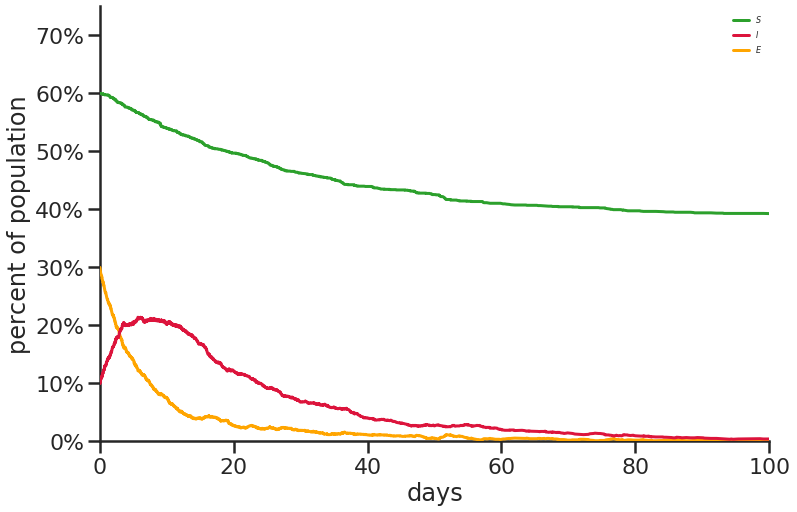

t = 0.00
t = 10.02
t = 20.05
t = 30.01
t = 40.08
t = 50.08
t = 60.05
t = 70.00
t = 80.13
t = 90.13
t = 100.92
t = 110.24
t = 120.02


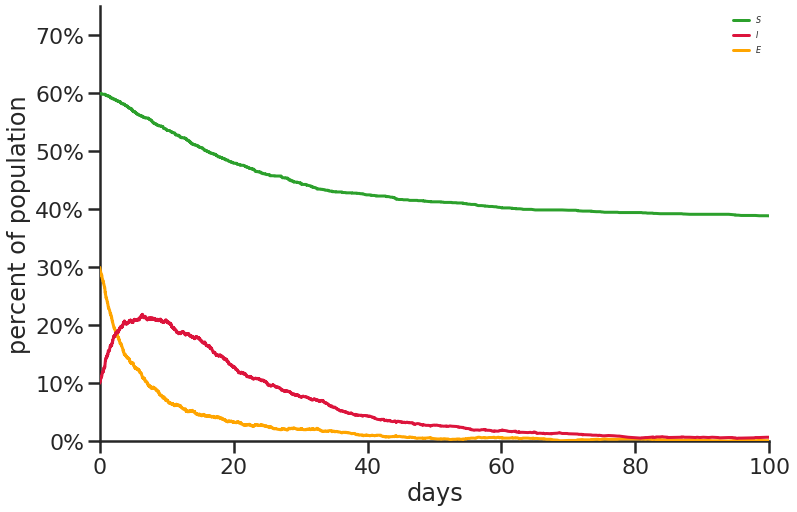

t = 0.01
t = 10.01
t = 20.03
t = 30.01
t = 40.01
t = 50.18
t = 60.21
t = 70.12
t = 80.19
t = 90.18
t = 110.22


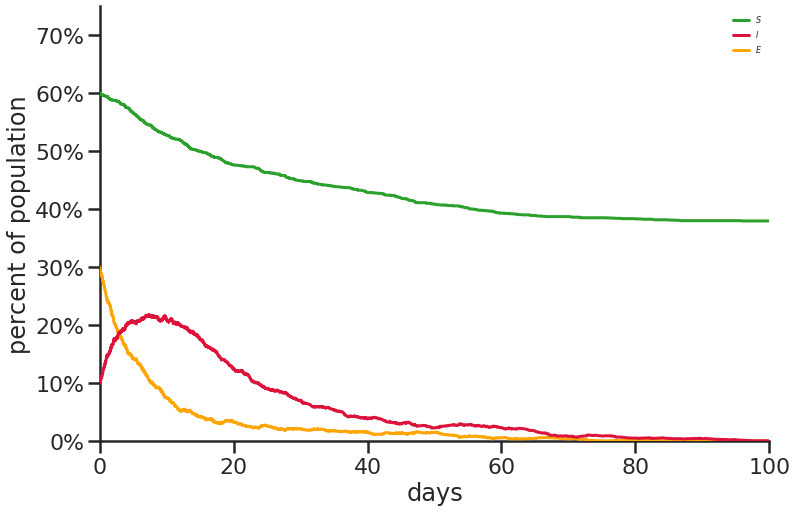

t = 0.00
t = 10.02
t = 20.01
t = 30.01
t = 40.09
t = 50.01
t = 60.16
t = 70.10
t = 80.00
t = 90.29
t = 100.35
t = 110.08
t = 140.16
t = 150.54
t = 160.09
t = 170.05
t = 180.23


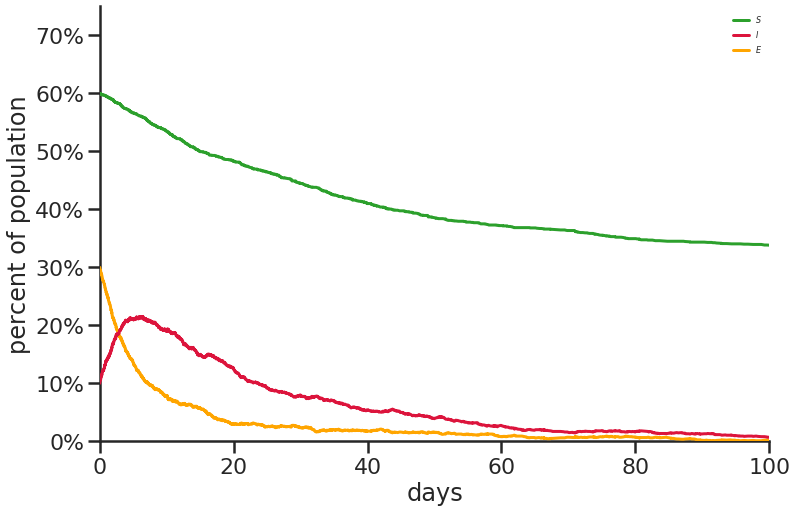

t = 0.01
t = 10.02
t = 20.02
t = 30.06
t = 40.00
t = 50.08
t = 60.16
t = 70.31
t = 80.40
t = 90.39
t = 100.06
t = 110.31
t = 120.56


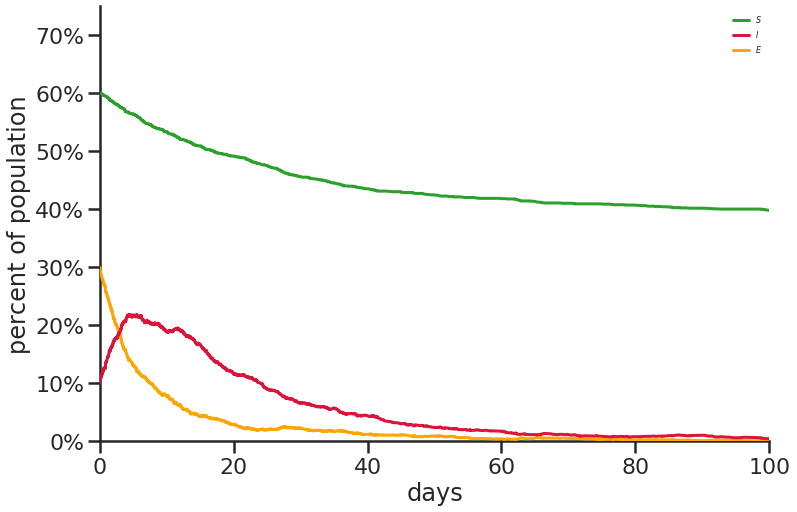

t = 0.03
t = 10.00
t = 20.00
t = 30.03
t = 40.00
t = 50.05
t = 60.19
t = 70.06
t = 80.01
t = 90.37
t = 100.66


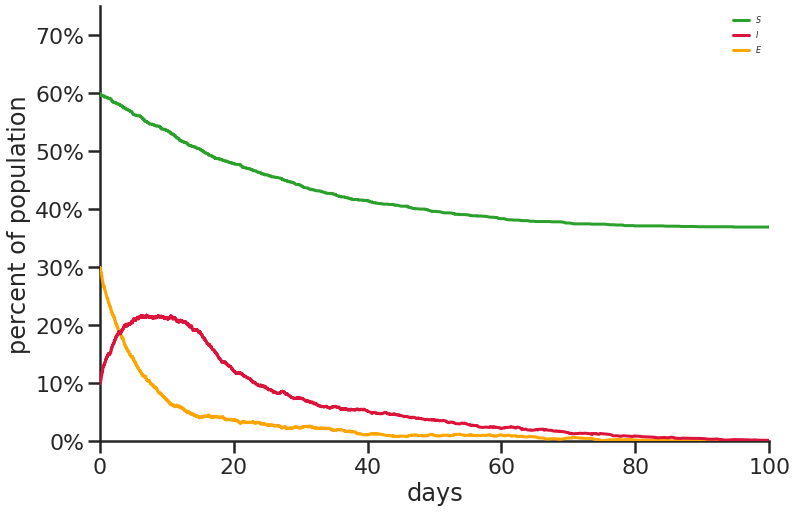

t = 0.01
t = 10.00
t = 20.01
t = 30.07
t = 40.04
t = 50.04
t = 60.19
t = 70.01
t = 80.08
t = 90.12


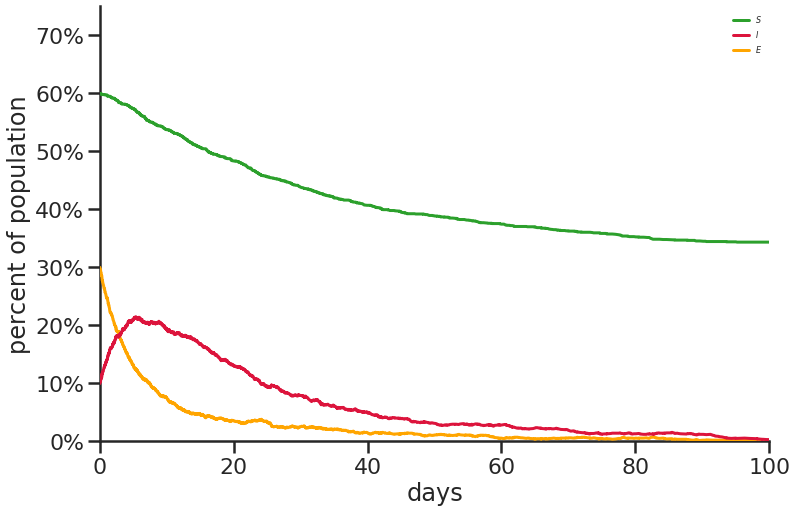

t = 0.00
t = 10.00
t = 20.01
t = 30.01
t = 40.21
t = 50.09
t = 60.23
t = 70.27
t = 80.52
t = 90.40


In [ ]:
for graph in graph_list_s:
    Y_loc=[]
    X_loc=[]
    T_loc=[]
    TP_loc=[]
    NPL_loc=[]
    AVG_loc=[]
    STDV_loc=[]
    COUNT_loc =[]
    LDAY_loc =[]
    for x in range(10):
        y,x,t,tp,npl,avg,stdv,count,lday = ipfnB(graph,2000,exp=0.30,inf =0.1)
        Y_loc.append(y)
        X_loc.append(x)
        T_loc.append(t)
        TP_loc.append(tp)
        NPL_loc.append(npl)
        AVG_loc.append(avg)
        STDV_loc.append(stdv)
        COUNT_loc.append(count)
        LDAY_loc.append(lday)
    Y.append(Y_loc)
    X.append(X_loc)
    T.append(T_loc)
    TP.append(TP_loc)
    NPL.append(NPL_loc)
    AVG.append(AVG_loc)
    STDV.append(STDV_loc)
    COUNT.append(COUNT_loc)
    LDAY.append(LDAY_loc)
    

In [10]:
with open('Cluster Experiments/No_constraint_30_10.pkl', 'rb') as infile:
    op1 = pickle.load(infile)

In [61]:
Y

[[0.1115, 0.118, 0.122, 0.1185, 0.1095, 0.1285, 0.1205, 0.1095, 0.1235, 0.119],
 [0.1265, 0.1345, 0.122, 0.1255, 0.128, 0.13, 0.128, 0.1255, 0.1315, 0.1265],
 [0.124, 0.139, 0.1225, 0.14, 0.1355, 0.12, 0.125, 0.132, 0.135, 0.1415],
 [0.1275, 0.1445, 0.1395, 0.1345, 0.123, 0.129, 0.1385, 0.137, 0.134, 0.134],
 [0.152, 0.134, 0.1465, 0.142, 0.157, 0.148, 0.147, 0.142, 0.149, 0.144],
 [0.1495, 0.166, 0.1475, 0.1485, 0.1365, 0.155, 0.1475, 0.155, 0.148, 0.146],
 [0.1385, 0.148, 0.144, 0.15, 0.156, 0.1535, 0.149, 0.1275, 0.138, 0.164],
 [0.161, 0.174, 0.1625, 0.165, 0.1455, 0.1575, 0.1605, 0.1455, 0.151, 0.1415],
 [0.147, 0.1575, 0.1795, 0.1405, 0.1585, 0.1695, 0.1645, 0.149, 0.1585, 0.156],
 [0.15, 0.146, 0.15, 0.1435, 0.1755, 0.1815, 0.173, 0.1615, 0.1725, 0.1635],
 [0.175, 0.155, 0.1675, 0.1695, 0.1655, 0.167, 0.1685, 0.1955, 0.1605, 0.159],
 [0.1795, 0.1755, 0.1615, 0.179, 0.167, 0.156, 0.168, 0.1765, 0.171, 0.167],
 [0.17, 0.154, 0.171, 0.165, 0.1625, 0.1545, 0.1745, 0.176, 0.164, 0.18

In [33]:
with open('Cluster Experiments/No_constraint_15_5.pkl', 'wb') as outfile:
    pickle.dump([Y,X,T,TP,NPL,AVG,STDV,COUNT,LDAY], outfile, pickle.HIGHEST_PROTOCOL)

In [11]:
with open('Cluster Experiments/No_constraint_15_5.pkl', 'rb') as infile:
    op2 = pickle.load(infile)

In [113]:
ld1 = np.asarray(op1[2])
ld2 = np.asarray(op2[2])

In [114]:
mean1=np.mean(ld1, axis =1)

In [115]:
mean2 = np.mean(ld2,axis=1)

In [116]:
median1 =np.mean(ld1, axis =1)
median2=np.mean(ld2, axis =1)

In [117]:
mx =[]
mn = []
for x in ld1:
    mx.append(max(x))
    mn.append(np.min(x))


In [118]:
maxval_30 = np.asarray(mx)
minval_30 = np.asarray(mn)

In [119]:
mx =[]
mn = []
for x in ld2:
    mx.append(max(x))
    mn.append(np.min(x))


In [120]:
maxval_15 = np.asarray(mx)
minval_15 = np.asarray(mn)

In [121]:
mycols = ['0','1k','1.5k','2k','2.5k','3k','3.5k','4','4.5k','5k','5.5k','6k','6.5k','7k','7.5k','8k','8.5k','9k','9.5k','10k','10.5k','11k']


In [122]:
df = pd.DataFrame()
df['30_10']= mean1
df['maxval_30'] = maxval_30
df['minval_30'] = minval_30
df['15_5'] = mean2
df['maxval_15'] = maxval_15
df['minval_15'] = minval_15
df['rows'] = mycols
df['median1'] = median1
df['median2'] =median2


In [98]:
df

,30_10,maxval_30,minval_30,15_5,maxval_15,minval_15,rows,median1,median2
0,78.812281,99.183472,66.035057,102.778413,137.445522,76.971732,0,78.812281,102.778413
1,154.526668,244.852657,97.239683,156.904946,216.486912,123.582769,1k,154.526668,156.904946
2,121.209732,146.804377,92.990617,150.608218,204.948577,110.249281,1.5k,121.209732,150.608218
3,114.164320,136.579279,100.303912,172.119326,255.825025,132.673498,2k,114.164320,172.119326
4,128.738532,259.828324,100.930179,157.358971,206.389791,119.441564,2.5k,128.738532,157.358971
5,122.334782,142.222774,100.046054,160.200459,211.046104,129.170066,3k,122.334782,160.200459
6,110.266543,129.616481,90.702785,166.350741,234.423818,116.926198,3.5k,110.266543,166.350741
7,124.515477,167.106230,95.482904,145.344564,167.225957,125.499049,4,124.515477,145.344564
8,109.541695,120.896400,98.189790,159.270775,199.792922,136.736113,4.5k,109.541695,159.270775
9,117.801554,142.769735,103.607957,137.141154,172.222992,118.267173,5k,117.801554,137.141154


Day of Zero

Day of Zero

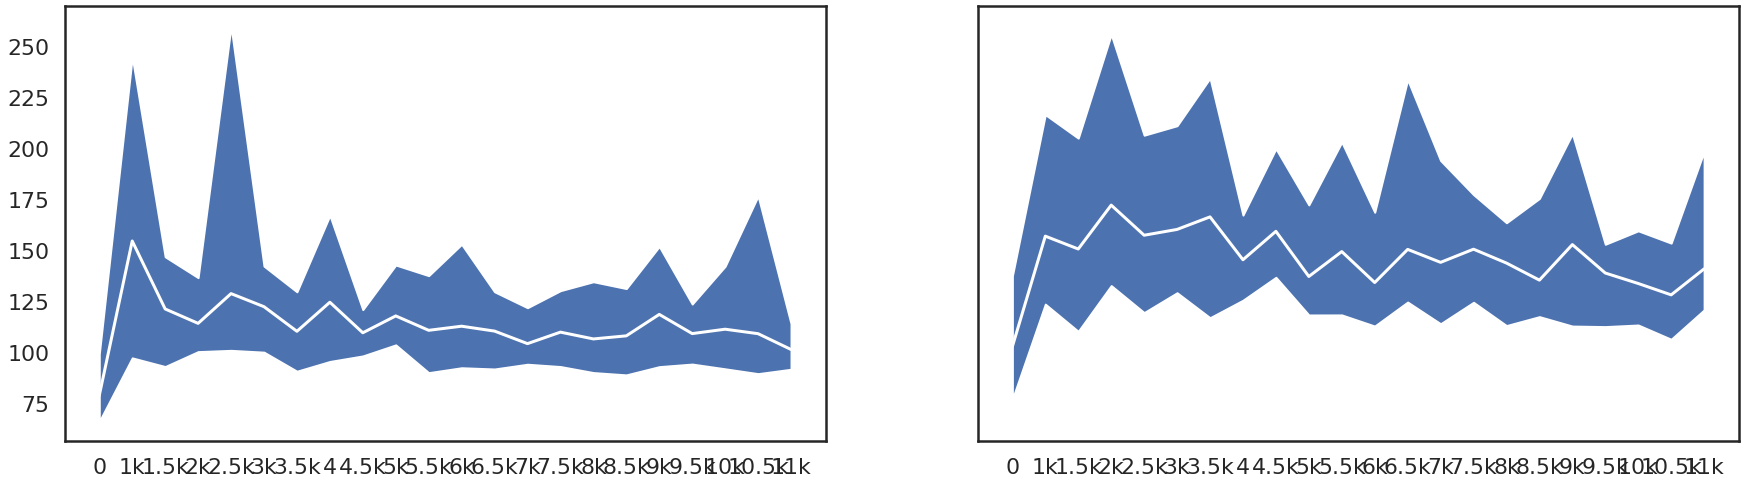

In [99]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(30,8))
axs[0].plot(df['rows'], df['30_10'], c='white')
axs[0].fill_between(x='rows',y1='minval_30',y2='maxval_30', data=df)

axs[1].plot(df['rows'], df['15_5'], c='white')
axs[1].fill_between(x='rows',y1='minval_15',y2='maxval_15', data=df)

plt.show()

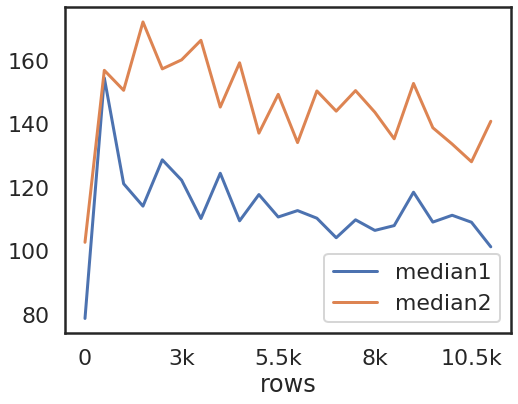

In [100]:
ax = plt.gca()

df.plot(kind='line',x='rows',y='median1',ax=ax)
df.plot(kind='line',x='rows',y='median2',ax=ax)

plt.show()

Peak Infections

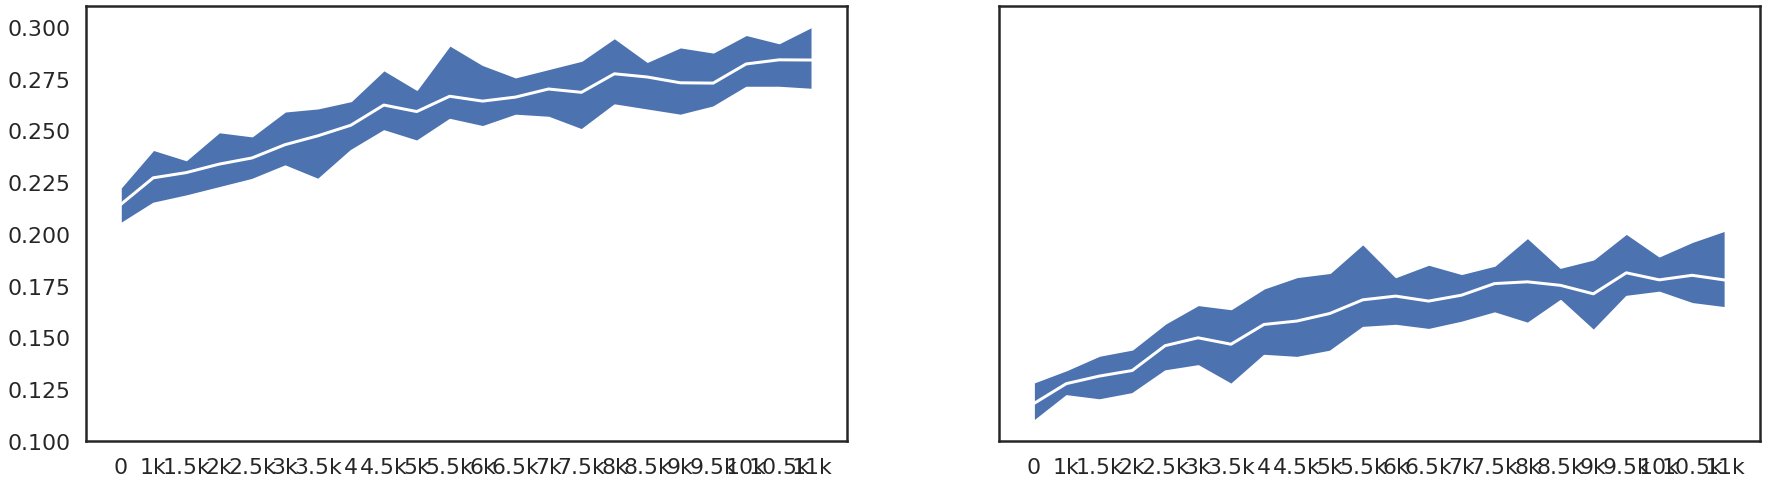

In [87]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(30,8))
axs[0].plot(df['rows'], df['30_10'], c='white')
axs[0].fill_between(x='rows',y1='minval_30',y2='maxval_30', data=df)

axs[1].plot(df['rows'], df['15_5'], c='white')
axs[1].fill_between(x='rows',y1='minval_15',y2='maxval_15', data=df)

plt.show()

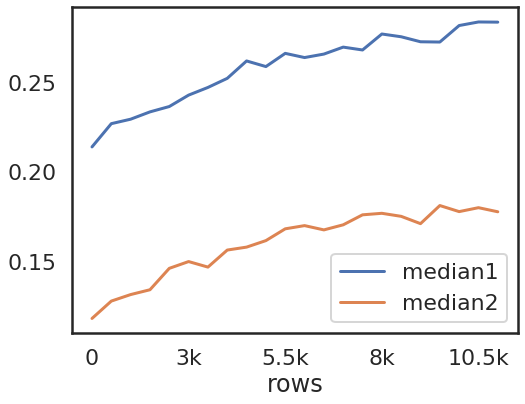

In [75]:
ax = plt.gca()

df.plot(kind='line',x='rows',y='median1',ax=ax)
df.plot(kind='line',x='rows',y='median2',ax=ax)

plt.show()

Day of Max Infections

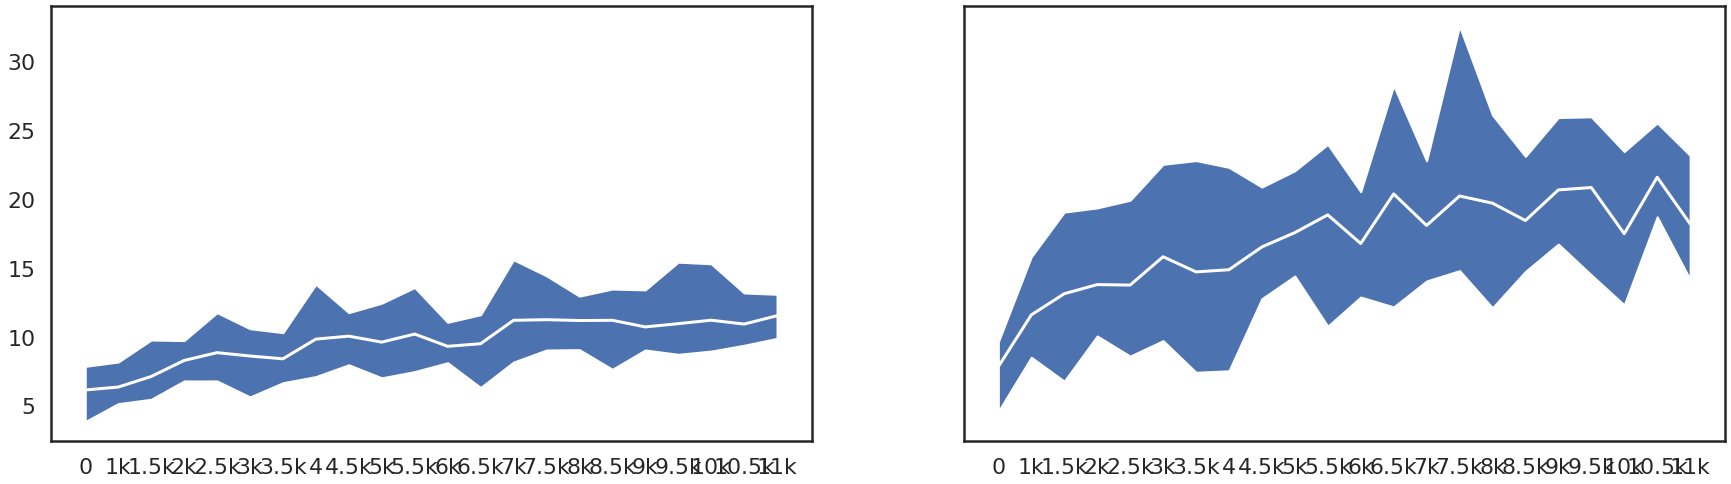

In [111]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(30,8))
axs[0].plot(df['rows'], df['30_10'], c='white')
axs[0].fill_between(x='rows',y1='minval_30',y2='maxval_30', data=df)

axs[1].plot(df['rows'], df['15_5'], c='white')
axs[1].fill_between(x='rows',y1='minval_15',y2='maxval_15', data=df)

plt.show()

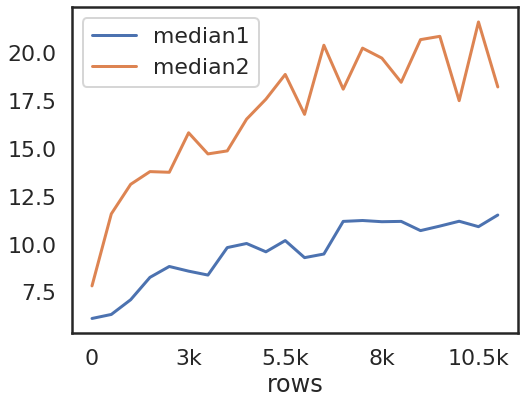

In [112]:
ax = plt.gca()

df.plot(kind='line',x='rows',y='median1',ax=ax)
df.plot(kind='line',x='rows',y='median2',ax=ax)

plt.show()

Total Infections

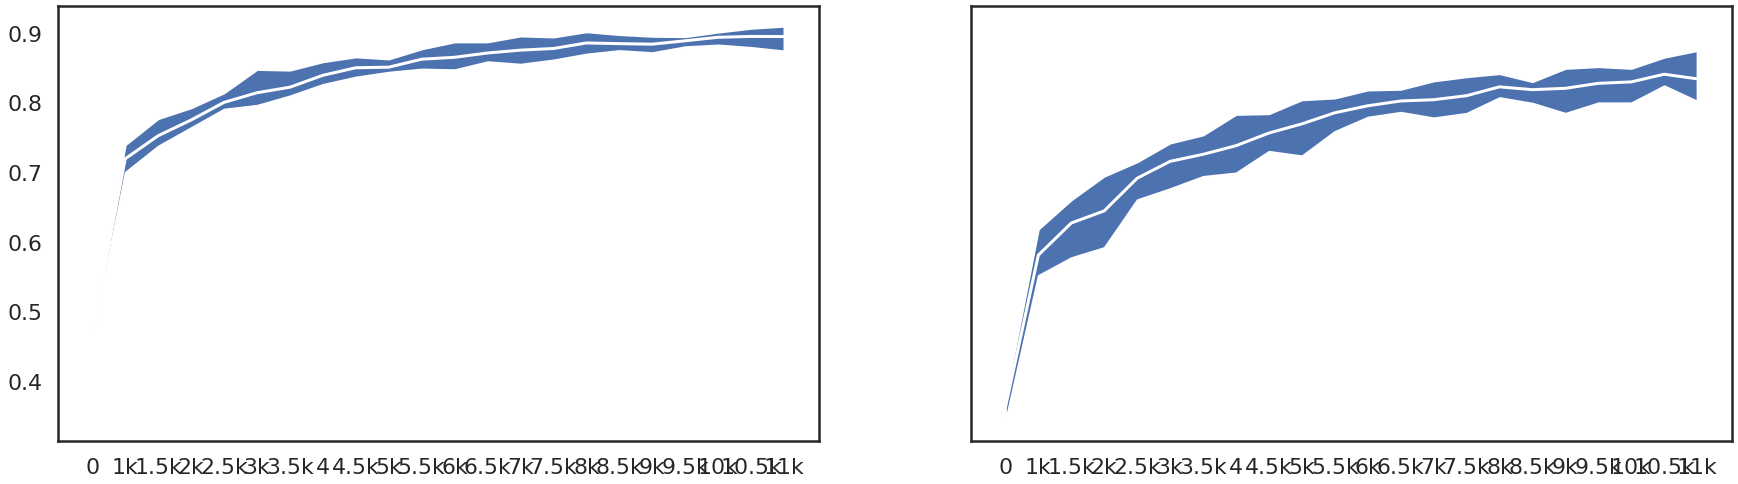

In [123]:
fig,axs = plt.subplots(1,2,sharey=True,figsize=(30,8))
axs[0].plot(df['rows'], df['30_10'], c='white')
axs[0].fill_between(x='rows',y1='minval_30',y2='maxval_30', data=df)

axs[1].plot(df['rows'], df['15_5'], c='white')
axs[1].fill_between(x='rows',y1='minval_15',y2='maxval_15', data=df)

plt.show()

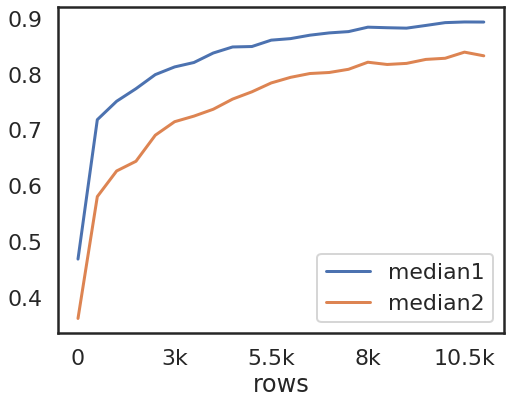

In [124]:
ax = plt.gca()

df.plot(kind='line',x='rows',y='median1',ax=ax)
df.plot(kind='line',x='rows',y='median2',ax=ax)

plt.show()